<a href="https://colab.research.google.com/github/y0tish/Appliance-Energy-Prediction/blob/main/Appliance_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Appliance Energy Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Individual -** Yotish Lakhanpal


# **Project Summary -**

The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each Wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averged for 10 minutes. Weather from nearest airport station was also merged together with the experimental data sets using the date and time column. We need to predict the enrgy use of appliances.
T1,T2,T3,T4,T5,T6,T7,T8 and T9 are the diffrent temperatures of diffrent rooms which are the columns of our dataset, In the same relative humidities for all nine rooms are given in the dataset. Some additional information is also provided in the dataset like outside building temperature and humidity. for refernce we are also provided the temperature and humidity of outside of the airport station. Some other conditions are also mentioned in the dataset like Pressure,Windspeed,Visibility,Tdewpoint.And the energy of appliances is also provided that we have to predict for an unseen data.

Firstly we tried to understand our dataset and variables and checked the null values and duplicate values.Then we saw the skewness of our variable and transform them accordingly for predicting the best results. We have also tried to remove Outliers from the variables.After doing EDA we concluded that our data is non linear in nature.We also discovered that our dataset has multicollinearity which can impact our results badly.We have try to remove those multicollinarity using feature engineering. To remove multicollinearity i have also tried the technique called VIF, but after adjusting the vif of all features my dataset become too simple. I have also tried Principle component analysis(PCA) to reduce the dimmension but the results were not satisfactory.By doing some basic feature engineering we have reduced the multicollinearity to some extend.

After cleaning and doing some pre processing of our data we have divided our data into two subset one is trainig datset and one is testing dataset using train_test_split function into 80-20% ratio respectively. Then we have used some ML algorithms to predict our energy variable.ML algorithms that are used are

* Linear Regression

* Polynomial Regression

* Lasso

* Ridge

* Decision Tree Regressor

* K Nearest Neighbour

* Support Vector Machine

* Bagging Regressor

* Gradient Boosting

* Xtreme gradient boosting

* Random Forest

* Xtra Tree Regressor

Tree based models are by far the best model while dealing with data set that has most of its features having no linear correlation with target variable. For similar reasons, linear models such as linear regression, Ridge and Lasso perform the worst.

The best Algorithm to use for this dataset is Extra Trees Regressor.

The untuned model was able to explain 74.7% of variance(R2_test_score=0.747),while the tuned model was able to explain 74.9% of variance which is a tiny improvement of 2.68%.

Our best model is a black box model so for model explainability we have use LIME algorithm.




# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**The problem statement of this project is to predict the energy use of appliances in a house based on temperature and humidity conditions monitored by a ZigBee wireless sensor network, as well as weather data from a nearby airport station. The dataset includes temperature and humidity readings from multiple rooms, as well as other environmental factors like pressure, wind speed, and visibility. The project involved data cleaning and pre-processing, as well as applying various machine learning algorithms to predict the energy use. The best-performing algorithm was found to be the Extra Trees Regressor. The goal of the project was to develop a model that could accurately predict energy use in order to optimize energy consumption in the house.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
dataset = pd.read_csv('/content/drive/MyDrive/CAPSTONE P2/data_application_energy.csv')

### Dataset First View

In [4]:
# Dataset First Look
dataset

date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                    ...         ...     ...        ...        ...   
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...         T9  \
0      19.200000  44.790000  19.790000  44.730000  19.000000  ...  17.033333   
1      19.200000  44.722500  19.790000  44.790000  19.000000  ...  17.066667   
2      19.200000  44.626667  19.790000  44.933333  18.926667  ...  17.000000   
3      19.200000  44.590000  19.790000  45.000000  18.890000  ...  17.000000   
4      19.200000  44.530000  19.790000  45.000000  18.890000  ...  17.000000   
...          ...        ...        ...        ...        ...  ...        ...   
19730  25.890000  42.025714  27.200000  41.163333  24.700000  ...  23.200000   
19731  25.754000  42.080000  27.133333  41.223333  24.700000  ...  23.200000   
19732  25.628571  42.768571  27.050000  41.690000  24.700000  ...  23.200000   
19733  25.414000  43.036000  26.890000  41.290000  24.700000  ...  23.200000   
19734  25.264286  42.971429  26.823333  41.156667  24.700000  ...  23.200000   

          RH_9      T_out  Press_mm_hg     RH_out  Windspeed  Visibility  \
0      45.5300   6.600000        733.5  92.000000   7.000000   63.000000   
1      45.5600   6.483333        733.6  92.000000   6.666667   59.166667   
2      45.5000   6.366667        733.7  92.000000   6.333333   55.333333   
3      45.4000   6.250000        733.8  92.000000   6.000000   51.500000   
4      45.4000   6.133333        733.9  92.000000   5.666667   47.666667   
...        ...        ...          ...        ...        ...         ...   
19730  46.7900  22.733333        755.2  55.666667   3.333333   23.666667   
19731  46.7900  22.600000        755.2  56.000000   3.500000   24.500000   
19732  46.7900  22.466667        755.2  56.333333   3.666667   25.333333   
19733  46.8175  22.333333        755.2  56.666667   3.833333   26.166667   
19734  46.8450  22.200000        755.2  57.000000   4.000000   27.000000   

       Tdewpoint        rv1        rv2  
0       5.300000  13.275433  13.275433  
1       5.200000  18.606195  18.606195  
2       5.100000  28.642668  28.642668  
3       5.000000  45.410389  45.410389  
4       4.900000  10.084097  10.084097  
...          ...        ...        ...  
19730  13.333333  43.096812  43.096812  
19731  13.300000  49.282940  49.282940  
19732  13.266667  29.199117  29.199117  
19733  13.233333   6.322784   6.322784  
19734  13.200000  34.118851  34.118851  

[19735 rows x 29 columns]

### Dataset Information

In [5]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
dataset.shape

(19735, 29)

* **Dataset has mostly float and integer values.**
* **19735-Rows and 29-Columns**

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

* **There are no duplicate values**

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
dataset.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

* **No Null Values!**

### What did I know about my dataset?

* **From the dataset we can see that all the column are in integer except date column**.

* **There are No null values in the dataset**.

* **There are no duplicate values**.





## ***2. Understanding Our Variables***

In [9]:
# Dataset Columns
dataset.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [10]:
# Dataset Describe
dataset.describe(include='all')

date    Appliances        lights            T1  \
count                 19735  19735.000000  19735.000000  19735.000000   
unique                19735           NaN           NaN           NaN   
top     2016-01-11 17:00:00           NaN           NaN           NaN   
freq                      1           NaN           NaN           NaN   
mean                    NaN     97.694958      3.801875     21.686571   
std                     NaN    102.524891      7.935988      1.606066   
min                     NaN     10.000000      0.000000     16.790000   
25%                     NaN     50.000000      0.000000     20.760000   
50%                     NaN     60.000000      0.000000     21.600000   
75%                     NaN    100.000000      0.000000     22.600000   
max                     NaN   1080.000000     70.000000     26.260000   

                RH_1            T2          RH_2            T3          RH_3  \
count   19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       40.259739     20.341219     40.420420     22.267611     39.242500   
std         3.979299      2.192974      4.069813      2.006111      3.254576   
min        27.023333     16.100000     20.463333     17.200000     28.766667   
25%        37.333333     18.790000     37.900000     20.790000     36.900000   
50%        39.656667     20.000000     40.500000     22.100000     38.530000   
75%        43.066667     21.500000     43.260000     23.290000     41.760000   
max        63.360000     29.856667     56.026667     29.236000     50.163333   

                  T4  ...            T9          RH_9         T_out  \
count   19735.000000  ...  19735.000000  19735.000000  19735.000000   
unique           NaN  ...           NaN           NaN           NaN   
top              NaN  ...           NaN           NaN           NaN   
freq             NaN  ...           NaN           NaN           NaN   
mean       20.855335  ...     19.485828     41.552401      7.411665   
std         2.042884  ...      2.014712      4.151497      5.317409   
min        15.100000  ...     14.890000     29.166667     -5.000000   
25%        19.530000  ...     18.000000     38.500000      3.666667   
50%        20.666667  ...     19.390000     40.900000      6.916667   
75%        22.100000  ...     20.600000     44.338095     10.408333   
max        26.200000  ...     24.500000     53.326667     26.100000   

         Press_mm_hg        RH_out     Windspeed    Visibility     Tdewpoint  \
count   19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      755.522602     79.750418      4.039752     38.330834      3.760707   
std         7.399441     14.901088      2.451221     11.794719      4.194648   
min       729.300000     24.000000      0.000000      1.000000     -6.600000   
25%       750.933333     70.333333      2.000000     29.000000      0.900000   
50%       756.100000     83.666667      3.666667     40.000000      3.433333   
75%       760.933333     91.666667      5.500000     40.000000      6.566667   
max       772.300000    100.000000     14.000000     66.000000     15.500000   

                 rv1           rv2  
count   19735.000000  19735.000000  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean       24.988033     24.988033  
std        14.496634     14.496634  
min         0.005322      0.005322  
25%        12.497889     12.497889  
50%        24.897653     24.897653  
7

In [11]:
#Renaming the column names
dataset.rename(columns={'Appliances':'Energy(Wh)','T1':'Temp_kitch','RH_1':'Humid_kitch','T2':'Temp_liv','RH_2':'Humid_liv','T3':'Temp_laundary','RH_3':'Humid_laundary','T4':'Temp_off','RH_4':'Humd_off','T5':'Temp_bath','RH_5':'Humid_bath','T6':'Temp_out_building(N)','RH_6':'Humid_out_build(N)','T7':'Temp_iron','RH_7':'Humid_iron','T8':'Temp_teen','RH_8':'Humid_teen','T9':'Temp_parent','RH_9':'Humid_parent',},inplace=True)

### Variables Description 

In [12]:
dataset.columns

Index(['date', 'Energy(Wh)', 'lights', 'Temp_kitch', 'Humid_kitch', 'Temp_liv',
       'Humid_liv', 'Temp_laundary', 'Humid_laundary', 'Temp_off', 'Humd_off',
       'Temp_bath', 'Humid_bath', 'Temp_out_building(N)', 'Humid_out_build(N)',
       'Temp_iron', 'Humid_iron', 'Temp_teen', 'Humid_teen', 'Temp_parent',
       'Humid_parent', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')



---


* Dependent Variable

---

* Energy(Wh)-Energy of appliances.




---


* Independent Variable

---


* Temperature Conditions:
* Temp_kitch(Kitchen Temperature in degree celcius)
* Temp_living(Living room Temperature in degree celcius)
* Temp_laundary(Laundar room Temperature in degree celcius)
* Temp_off(Office Temperature in degree celcius)
* Temp_bath(Bathroom Temperature in degree celcius)
* Temp_out_building(N)(Outside Temperature of building(North side) in degree celcius)
* Temp_iron(Ironing room Temperature in degree celcius)
* Temp_teen(Teenager room Temperature in degree celcius)
* Temp_parent(Parents room Temperature in degree celcius)

* Humidity Conditions:
* Humid_kitch(Kitchen Humidity in %)
* Humid_living(Living room  Humidity in %)
* Humid_laundary(Laundar room  Humidity in %)
* Humid_off(Office  Humidity in %)
* Humid_bath(Bathroom  Humidity in %)
* Humid_out_building(N)(Outside  Humidity of building(North side) in %)
* Humid_iron(Ironing room  Humidity in %)
* Humid_teen(Teenager room Humidity in %)
* Humid_parent(Parents room  Humidity in %)


---


* Outside Conditions:


---


* T_out(Outside Temperature) 
* Press_mm_hg(Outside Pressure in mm_of_hg)
* RH_out(Outside Humidity)
* Windspeed(in m/s)
* Visibility(Km)
* Tdewpoint(Dew Point Temperature-Below this temperature air become saturated with water vapour means Relative Humidity becames 1)
* rv1 and rv2 are the random variable. 


---


* Date


---



In [13]:
dataset.describe(include='all')

date    Energy(Wh)        lights    Temp_kitch  \
count                 19735  19735.000000  19735.000000  19735.000000   
unique                19735           NaN           NaN           NaN   
top     2016-01-11 17:00:00           NaN           NaN           NaN   
freq                      1           NaN           NaN           NaN   
mean                    NaN     97.694958      3.801875     21.686571   
std                     NaN    102.524891      7.935988      1.606066   
min                     NaN     10.000000      0.000000     16.790000   
25%                     NaN     50.000000      0.000000     20.760000   
50%                     NaN     60.000000      0.000000     21.600000   
75%                     NaN    100.000000      0.000000     22.600000   
max                     NaN   1080.000000     70.000000     26.260000   

         Humid_kitch      Temp_liv     Humid_liv  Temp_laundary  \
count   19735.000000  19735.000000  19735.000000   19735.000000   
unique           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN            NaN   
mean       40.259739     20.341219     40.420420      22.267611   
std         3.979299      2.192974      4.069813       2.006111   
min        27.023333     16.100000     20.463333      17.200000   
25%        37.333333     18.790000     37.900000      20.790000   
50%        39.656667     20.000000     40.500000      22.100000   
75%        43.066667     21.500000     43.260000      23.290000   
max        63.360000     29.856667     56.026667      29.236000   

        Humid_laundary      Temp_off  ...   Temp_parent  Humid_parent  \
count     19735.000000  19735.000000  ...  19735.000000  19735.000000   
unique             NaN           NaN  ...           NaN           NaN   
top                NaN           NaN  ...           NaN           NaN   
freq               NaN           NaN  ...           NaN           NaN   
mean         39.242500     20.855335  ...     19.485828     41.552401   
std           3.254576      2.042884  ...      2.014712      4.151497   
min          28.766667     15.100000  ...     14.890000     29.166667   
25%          36.900000     19.530000  ...     18.000000     38.500000   
50%          38.530000     20.666667  ...     19.390000     40.900000   
75%          41.760000     22.100000  ...     20.600000     44.338095   
max          50.163333     26.200000  ...     24.500000     53.326667   

               T_out   Press_mm_hg        RH_out     Windspeed    Visibility  \
count   19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        7.411665    755.522602     79.750418      4.039752     38.330834   
std         5.317409      7.399441     14.901088      2.451221     11.794719   
min        -5.000000    729.300000     24.000000      0.000000      1.000000   
25%         3.666667    750.933333     70.333333      2.000000     29.000000   
50%         6.916667    756.100000     83.666667      3.666667     40.000000   
75%        10.408333    760.933333     91.666667      5.500000     40.000000   
max        26.100000    772.300000    100.000000     14.000000     66.000000   

           Tdewpoint           rv1           rv2  
count   19735.000000  19735.000000  19735.000000  
unique           NaN           NaN           NaN  
top              NaN           NaN           NaN  
freq             NaN           NaN           NaN  
mean        3.760707     24.988033     24.988033  
std         4.194648     14.496634     14.496634  
min        -6.600000      0.005322      0.005322  
25%         0.900000     12.497889     12.497889  
50%         3.433333     24.897653     24.89

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
dataset.nunique()

date                    19735
Energy(Wh)                 92
lights                      8
Temp_kitch                722
Humid_kitch              2547
Temp_liv                 1650
Humid_liv                3376
Temp_laundary            1426
Humid_laundary           2618
Temp_off                 1390
Humd_off                 2987
Temp_bath                2263
Humid_bath               7571
Temp_out_building(N)     4446
Humid_out_build(N)       9709
Temp_iron                1955
Humid_iron               5891
Temp_teen                2228
Humid_teen               6649
Temp_parent               924
Humid_parent             3388
T_out                    1730
Press_mm_hg              2189
RH_out                    566
Windspeed                 189
Visibility                413
Tdewpoint                1409
rv1                     19735
rv2                     19735
dtype: int64

## ***Let's Change the Dtype  of date column.***

In [15]:
#Changing object type to datetime type
dataset['date']=pd.to_datetime(dataset['date'])

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  19735 non-null  datetime64[ns]
 1   Energy(Wh)            19735 non-null  int64         
 2   lights                19735 non-null  int64         
 3   Temp_kitch            19735 non-null  float64       
 4   Humid_kitch           19735 non-null  float64       
 5   Temp_liv              19735 non-null  float64       
 6   Humid_liv             19735 non-null  float64       
 7   Temp_laundary         19735 non-null  float64       
 8   Humid_laundary        19735 non-null  float64       
 9   Temp_off              19735 non-null  float64       
 10  Humd_off              19735 non-null  float64       
 11  Temp_bath             19735 non-null  float64       
 12  Humid_bath            19735 non-null  float64       
 13  Temp_out_buildin

## ***Let's make a copy of dataset***

In [17]:
df=dataset.copy()

## ***Data Wrangling***

In [18]:
df.columns

Index(['date', 'Energy(Wh)', 'lights', 'Temp_kitch', 'Humid_kitch', 'Temp_liv',
       'Humid_liv', 'Temp_laundary', 'Humid_laundary', 'Temp_off', 'Humd_off',
       'Temp_bath', 'Humid_bath', 'Temp_out_building(N)', 'Humid_out_build(N)',
       'Temp_iron', 'Humid_iron', 'Temp_teen', 'Humid_teen', 'Temp_parent',
       'Humid_parent', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [19]:
#First look
df.head(2)

date  Energy(Wh)  lights  Temp_kitch  Humid_kitch  Temp_liv  \
0 2016-01-11 17:00:00          60      30       19.89    47.596667      19.2   
1 2016-01-11 17:10:00          60      30       19.89    46.693333      19.2   

   Humid_liv  Temp_laundary  Humid_laundary  Temp_off  ...  Temp_parent  \
0    44.7900          19.79           44.73      19.0  ...    17.033333   
1    44.7225          19.79           44.79      19.0  ...    17.066667   

   Humid_parent     T_out  Press_mm_hg  RH_out  Windspeed  Visibility  \
0         45.53  6.600000        733.5    92.0   7.000000   63.000000   
1         45.56  6.483333        733.6    92.0   6.666667   59.166667   

   Tdewpoint        rv1        rv2  
0        5.3  13.275433  13.275433  
1        5.2  18.606195  18.606195  

[2 rows x 29 columns]

In [20]:
df.describe()

Energy(Wh)        lights    Temp_kitch   Humid_kitch      Temp_liv  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

          Humid_liv  Temp_laundary  Humid_laundary      Temp_off  \
count  19735.000000   19735.000000    19735.000000  19735.000000   
mean      40.420420      22.267611       39.242500     20.855335   
std        4.069813       2.006111        3.254576      2.042884   
min       20.463333      17.200000       28.766667     15.100000   
25%       37.900000      20.790000       36.900000     19.530000   
50%       40.500000      22.100000       38.530000     20.666667   
75%       43.260000      23.290000       41.760000     22.100000   
max       56.026667      29.236000       50.163333     26.200000   

           Humd_off  ...   Temp_parent  Humid_parent         T_out  \
count  19735.000000  ...  19735.000000  19735.000000  19735.000000   
mean      39.026904  ...     19.485828     41.552401      7.411665   
std        4.341321  ...      2.014712      4.151497      5.317409   
min       27.660000  ...     14.890000     29.166667     -5.000000   
25%       35.530000  ...     18.000000     38.500000      3.666667   
50%       38.400000  ...     19.390000     40.900000      6.916667   
75%       42.156667  ...     20.600000     44.338095     10.408333   
max       51.090000  ...     24.500000     53.326667     26.100000   

        Press_mm_hg        RH_out     Windspeed    Visibility     Tdewpoint  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean     755.522602     79.750418      4.039752     38.330834      3.760707   
std        7.399441     14.901088      2.451221     11.794719      4.194648   
min      729.300000     24.000000      0.000000      1.000000     -6.600000   
25%      750.933333     70.333333      2.000000     29.000000      0.900000   
50%      756.100000     83.666667      3.666667     40.000000      3.433333   
75%      760.933333     91.666667      5.500000     40.000000      6.566667   
max      772.300000    100.000000     14.000000     66.000000     15.500000   

                rv1           rv2  
count  19735.000000  19735.000000  
mean      24.988033     24.988033  
std       14.496634     14.496634  
min        0.005322      0.005322  
25%       12.497889     12.497889  
50%       24.897653     24.897653  
75%       37.583769     37.583769  
max       49.996530     49.996530  

[8 rows x 28 columns]

* We can see that 'lights' feature have 75% of '0' values, Hence droping this column.
* we can also see that two columns of random variables have same values this can lead to colinearity, we can use one of them or for now let's keep eye on those columns and if we found enough evidence to drop the columns we will do that. 

In [21]:
df=df.drop('lights',axis=1)

In [22]:
df.describe().columns

Index(['Energy(Wh)', 'Temp_kitch', 'Humid_kitch', 'Temp_liv', 'Humid_liv',
       'Temp_laundary', 'Humid_laundary', 'Temp_off', 'Humd_off', 'Temp_bath',
       'Humid_bath', 'Temp_out_building(N)', 'Humid_out_build(N)', 'Temp_iron',
       'Humid_iron', 'Temp_teen', 'Humid_teen', 'Temp_parent', 'Humid_parent',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

## ***Let's Divide dataset between dependent and independent variables.***

In [23]:
df.shape

(19735, 28)

In [24]:
#Dependent variable
dependent_variable = 'Energy(Wh)'

In [25]:
#Independent variable
independent_variables = list(set(df.describe().columns.tolist()) - {dependent_variable})
independent_variables

['Humid_bath',
 'Temp_parent',
 'Tdewpoint',
 'Temp_out_building(N)',
 'Humid_kitch',
 'Temp_liv',
 'RH_out',
 'Temp_iron',
 'Humd_off',
 'Temp_off',
 'rv2',
 'Humid_teen',
 'Humid_iron',
 'T_out',
 'Visibility',
 'Temp_teen',
 'Press_mm_hg',
 'Humid_out_build(N)',
 'Temp_bath',
 'Humid_laundary',
 'Humid_liv',
 'rv1',
 'Temp_laundary',
 'Humid_parent',
 'Temp_kitch',
 'Windspeed']

In [26]:
df[independent_variables].head(3)

Humid_bath  Temp_parent  Tdewpoint  Temp_out_building(N)  Humid_kitch  \
0       55.20    17.033333        5.3              7.026667    47.596667   
1       55.20    17.066667        5.2              6.833333    46.693333   
2       55.09    17.000000        5.1              6.560000    46.300000   

   Temp_liv  RH_out  Temp_iron   Humd_off   Temp_off  ...  Press_mm_hg  \
0      19.2    92.0       17.2  45.566667  19.000000  ...        733.5   
1      19.2    92.0       17.2  45.992500  19.000000  ...        733.6   
2      19.2    92.0       17.2  45.890000  18.926667  ...        733.7   

   Humid_out_build(N)  Temp_bath  Humid_laundary  Humid_liv        rv1  \
0           84.256667  17.166667       44.730000  44.790000  13.275433   
1           84.063333  17.166667       44.790000  44.722500  18.606195   
2           83.156667  17.166667       44.933333  44.626667  28.642668   

   Temp_laundary  Humid_parent  Temp_kitch  Windspeed  
0          19.79         45.53       19.89   7.000000  
1          19.79         45.56       19.89   6.666667  
2          19.79         45.50       19.89   6.333333  

[3 rows x 26 columns]

In [27]:
df[independent_variables].shape

(19735, 26)

In [28]:
df[dependent_variable]

0         60
1         60
2         50
3         50
4         60
        ... 
19730    100
19731     90
19732    270
19733    420
19734    430
Name: Energy(Wh), Length: 19735, dtype: int64

In [29]:
#max value in our dependent variable
df[dependent_variable].max()

1080

In [30]:
#min value in our dependent variable
df[dependent_variable].min()

10

In [31]:
df[dependent_variable].isna().sum()

0

## ***Exploratory Data Analysis***

* **Chart - 1(Distribution of Dependent variable)**

In [32]:
df['Energy(Wh)'].value_counts()

50      4368
60      3282
40      2019
70      1560
80      1205
        ... 
890        1
1070       1
910        1
1080       1
840        1
Name: Energy(Wh), Length: 92, dtype: int64

<Axes: xlabel='Energy(Wh)', ylabel='Density'>

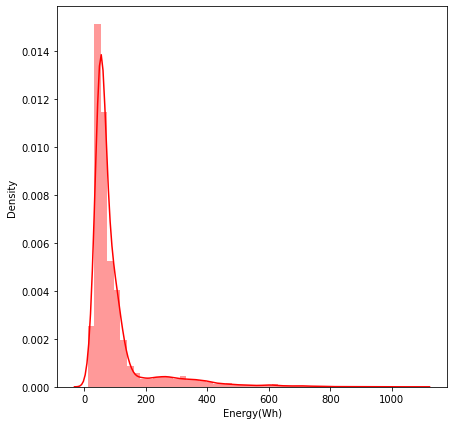

In [33]:
# Chart - 1 visualization code
plt.figure(figsize=(7,7))
sns.distplot(df['Energy(Wh)'],color="r")

##### 1. Why I you pick the specific chart?

**ML Models gives more reliable predictions if our independent and dependent variables both have gaussian distribution.(if variables have some linear dependency)**

**To check the outliers.**

##### 2. What is/are the insight(s) found from the chart?

Distribution is positively skewed, Therefore we have to transform it by various methods.

Text(0.5, 1.0, 'boxcox')

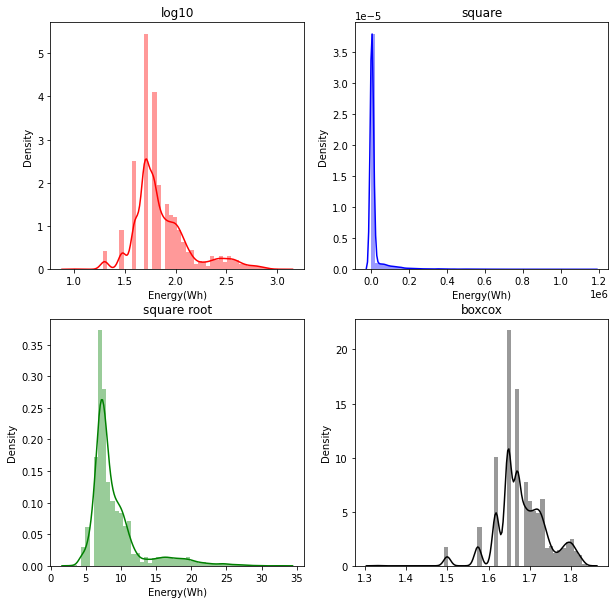

In [34]:
#transformation
fig,axes = plt.subplots(2,2,figsize=(10,10))
sns.distplot(np.log10(df['Energy(Wh)']),ax=axes[0,0],color="r").set_title('log10')
sns.distplot(df['Energy(Wh)']**2,ax=axes[0,1],color="b").set_title('square')
sns.distplot(np.sqrt(df['Energy(Wh)']),ax=axes[1,0],color="g").set_title('square root')
sns.distplot(boxcox(df['Energy(Wh)'])[0],ax=axes[1,1],color="black").set_title('boxcox')

* **Transformation using log gives a better tranformation.**


---



* **Chart - 2(Distribution of Independent Variables)**

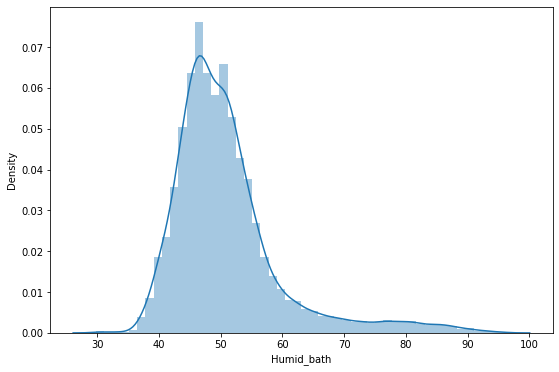

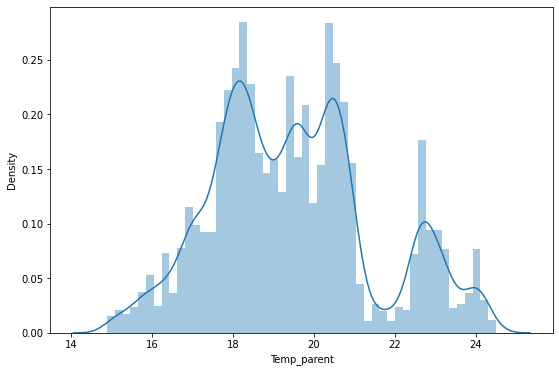

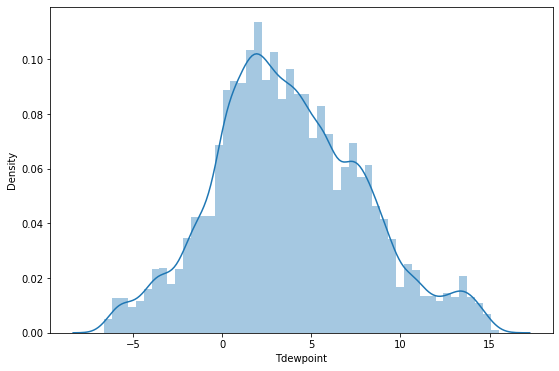

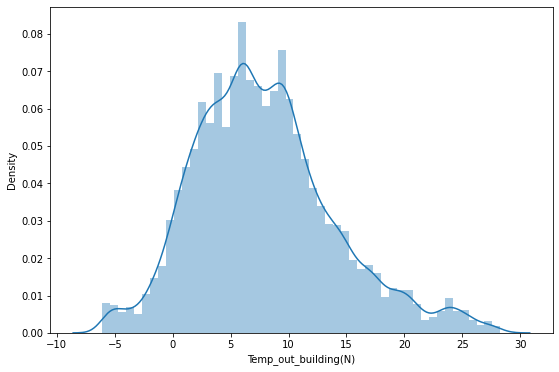

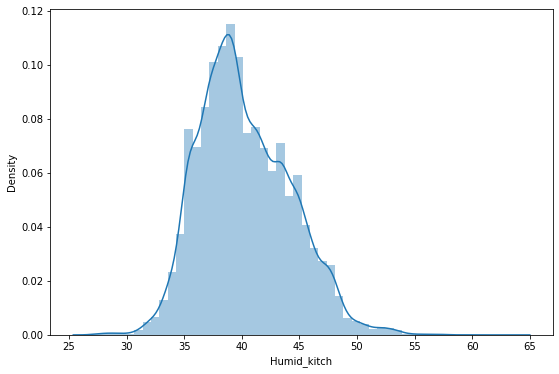

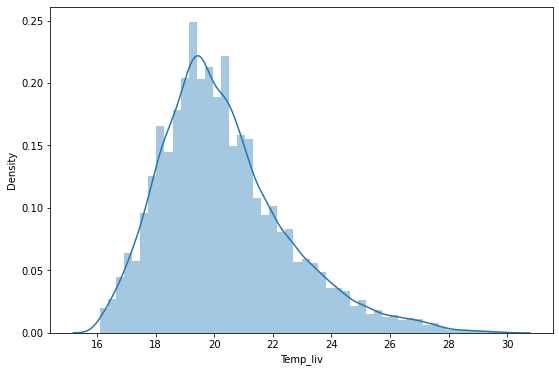

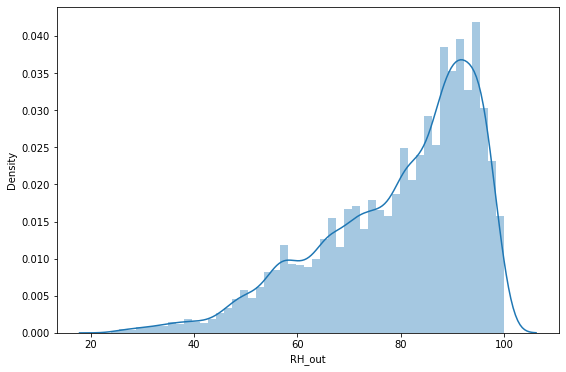

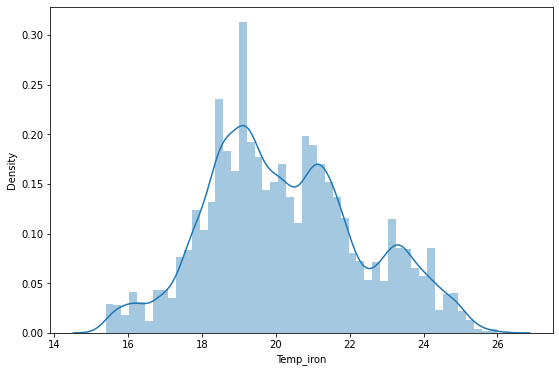

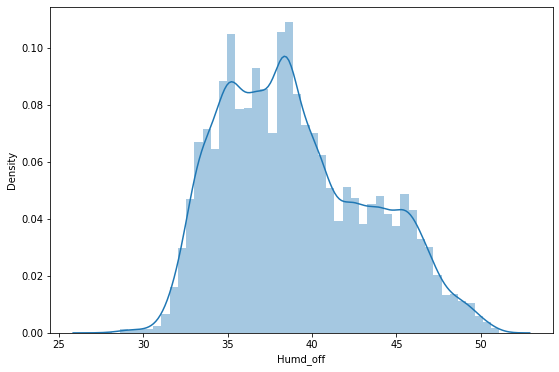

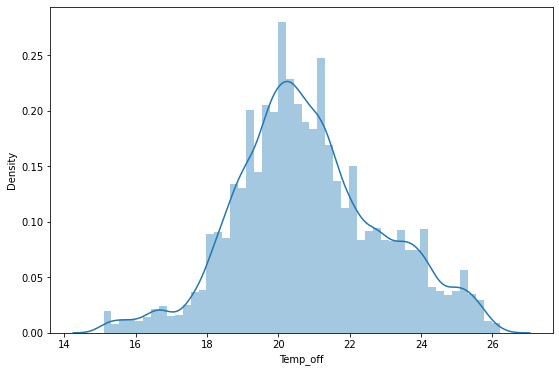

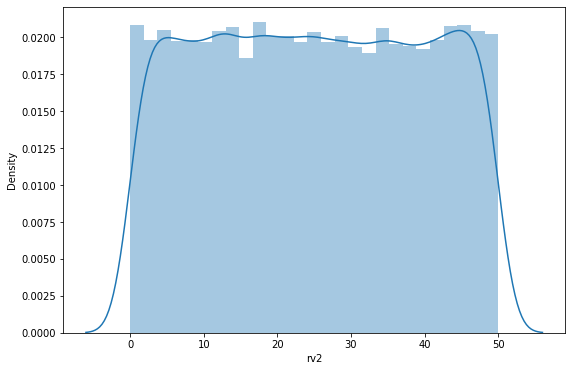

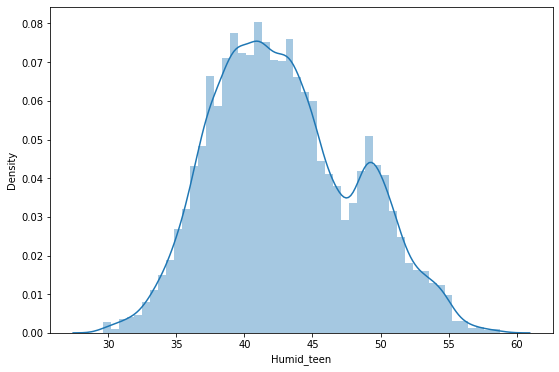

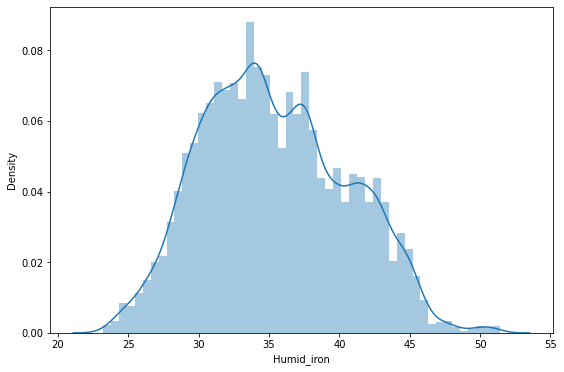

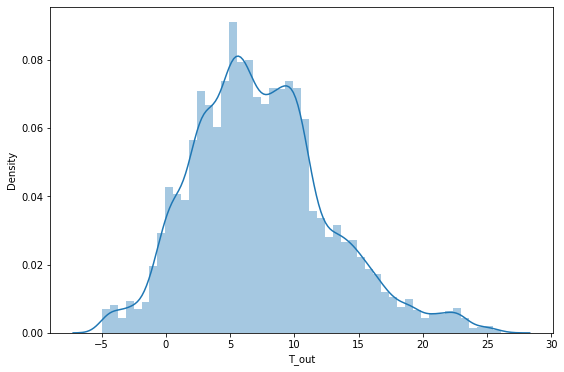

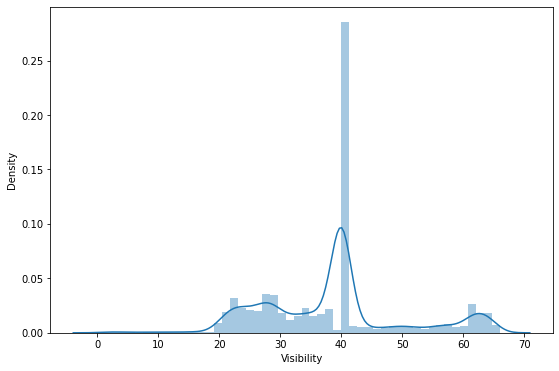

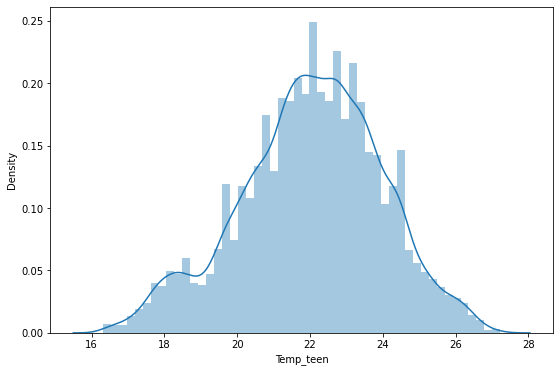

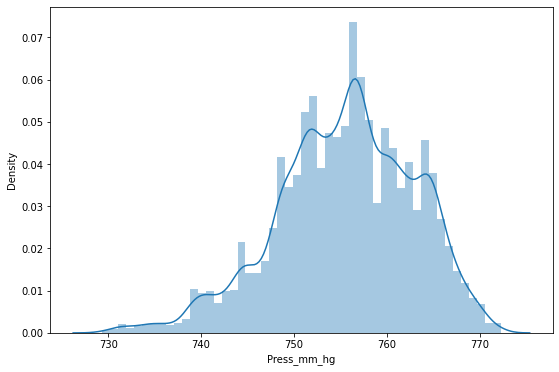

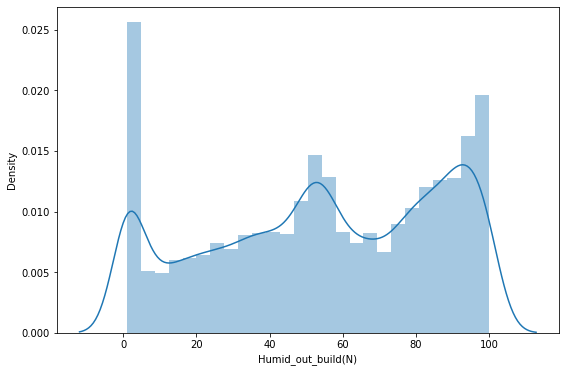

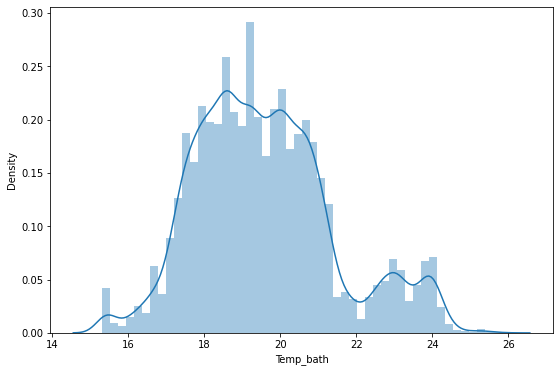

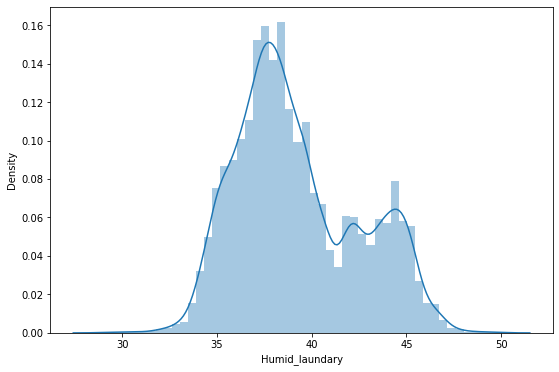

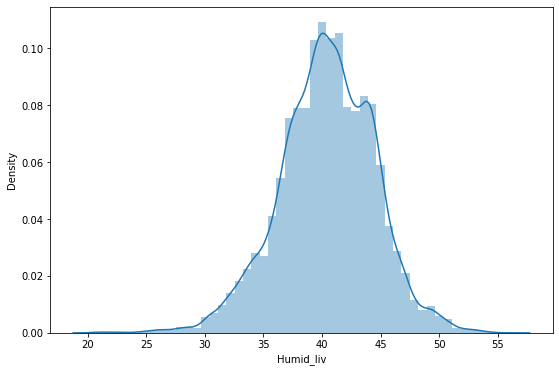

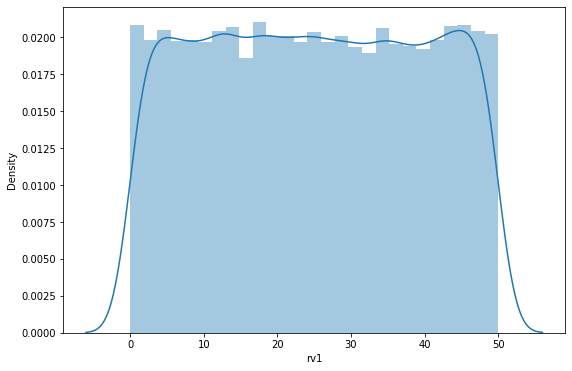

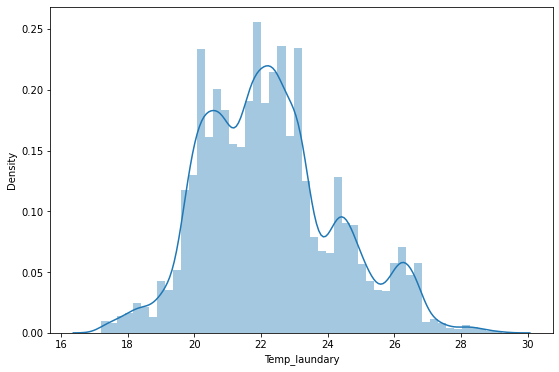

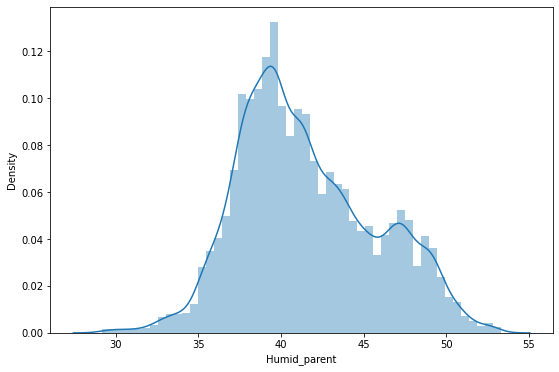

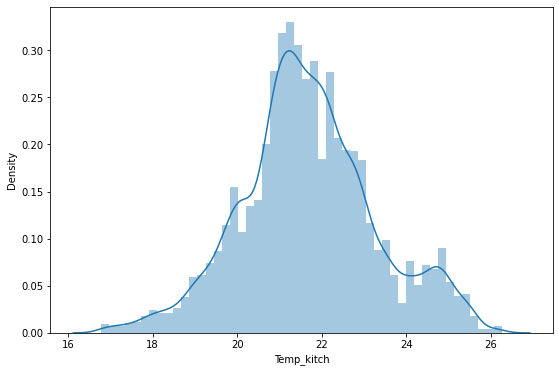

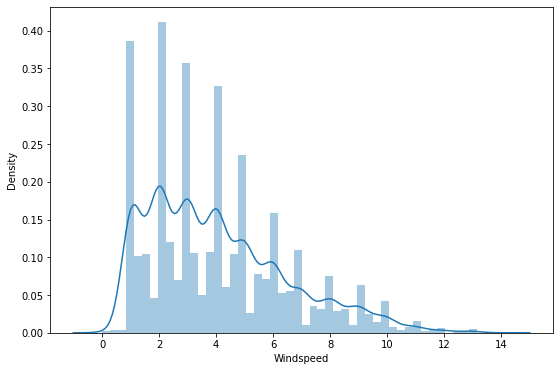

In [35]:
# Chart - 2 visualization code
for col in df[independent_variables]:
  fig = plt.figure(figsize=(9, 6))
  sns.distplot(df[col],kde=True)

##### 1. Why did I pick the specific chart?

We want see weather our dependent variable also follow gaussian distribution or not.


##### 2. What is/are the insight(s) found from the chart?

* Mostly all independent variables have gaussian distribution.Except the variables like RH_ount,Visibility,humid_out_build(N),random variables,windspeed.

* Distribution of Temp_liv,humid_bath are somewhat positivly skewed.
* Both Random Variables have uniform distribution.


---





* **Chart - 3(Distribution)**

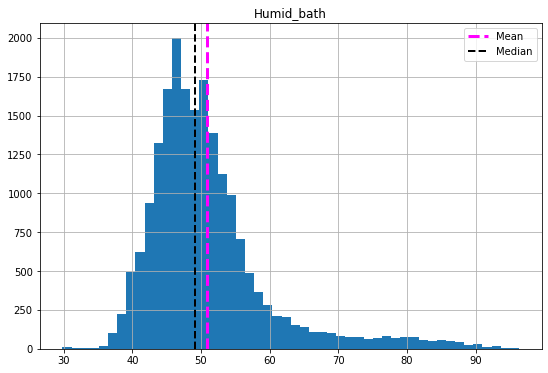

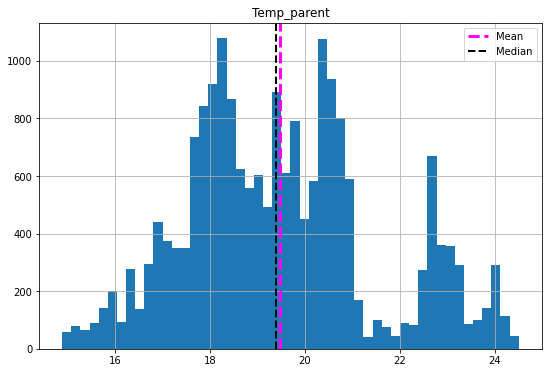

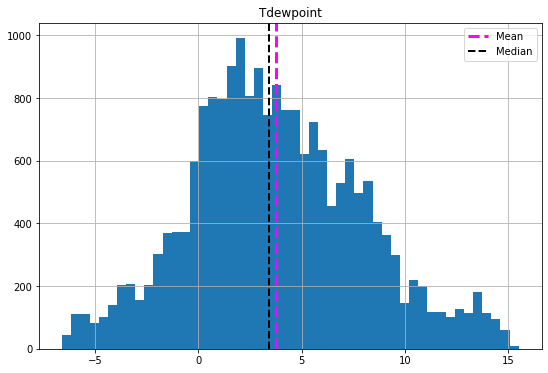

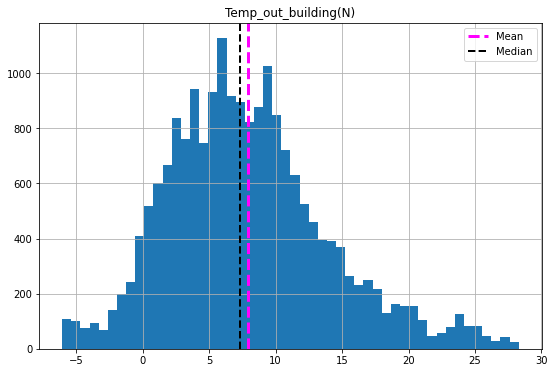

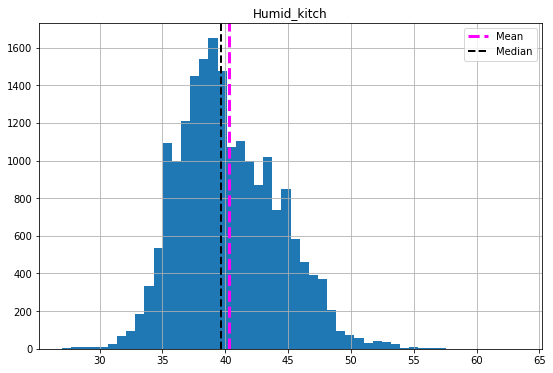

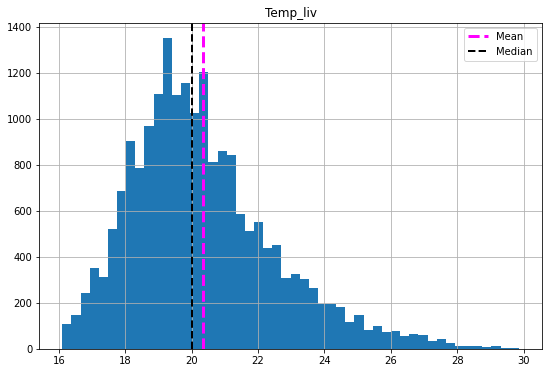

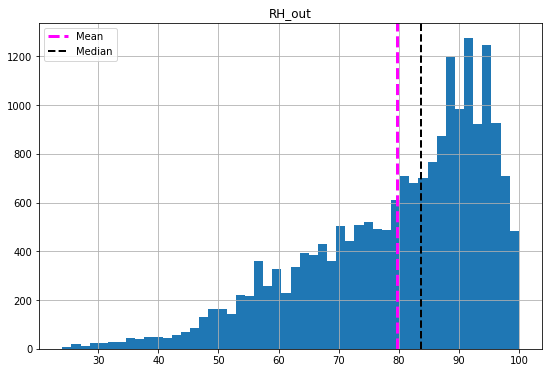

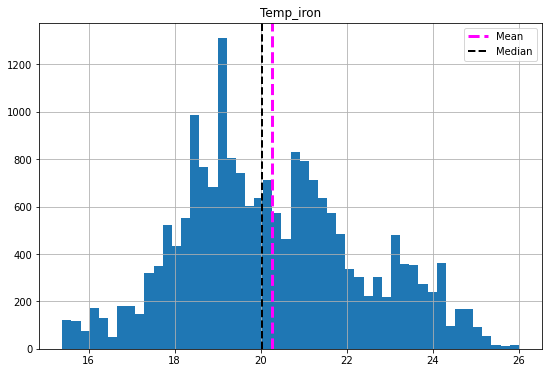

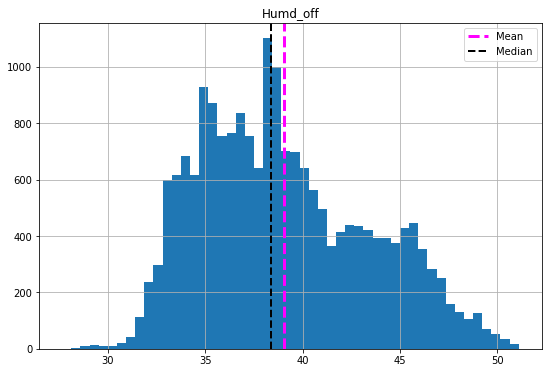

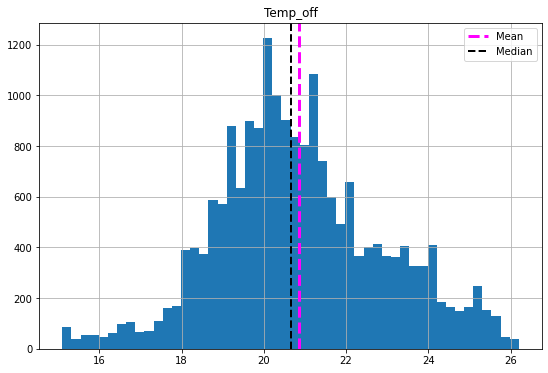

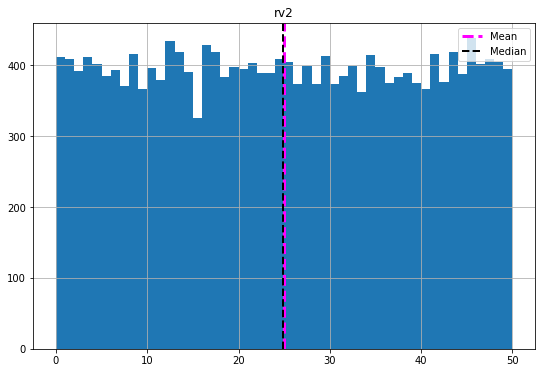

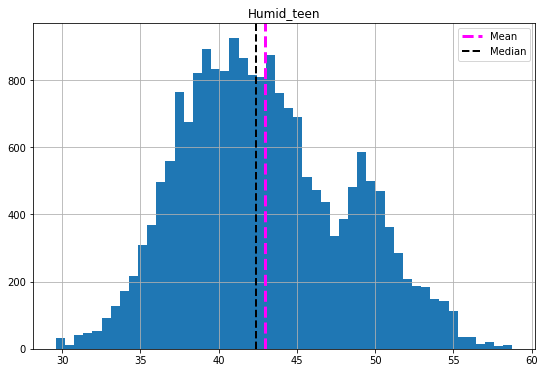

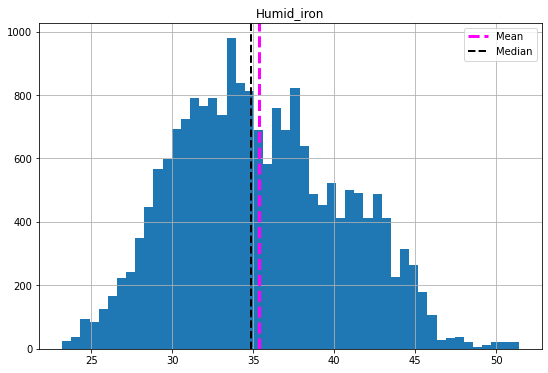

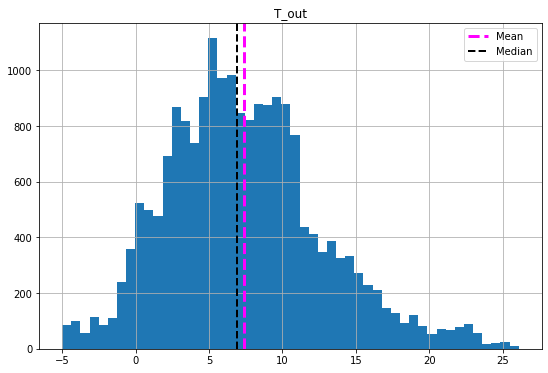

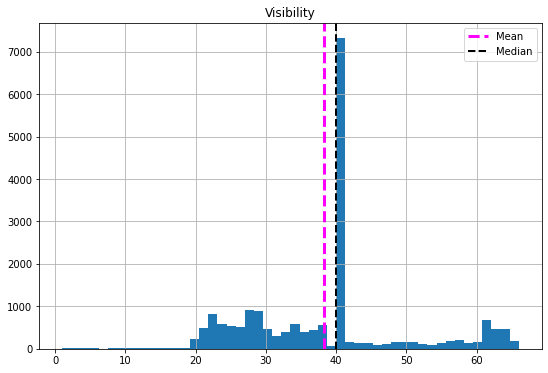

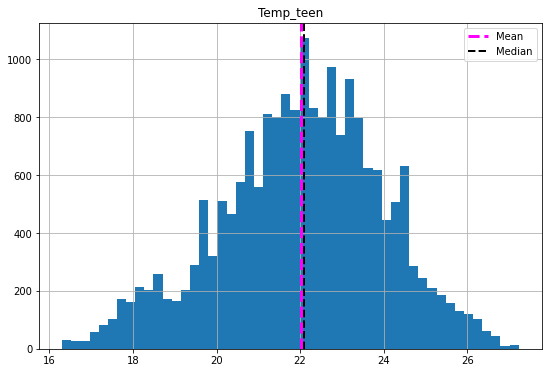

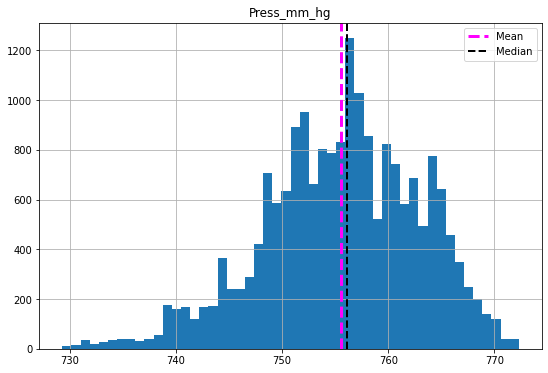

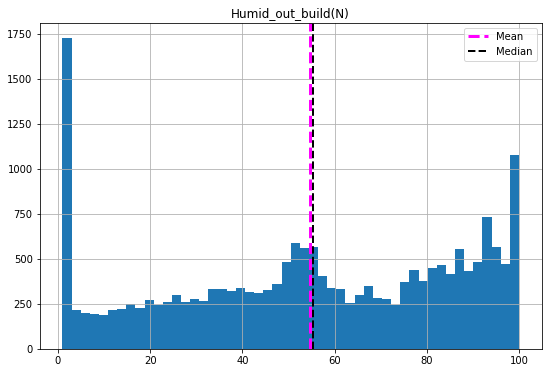

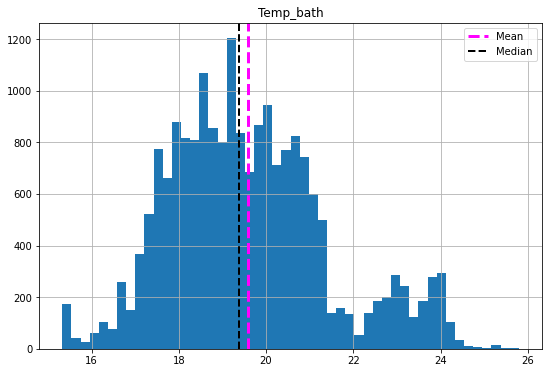

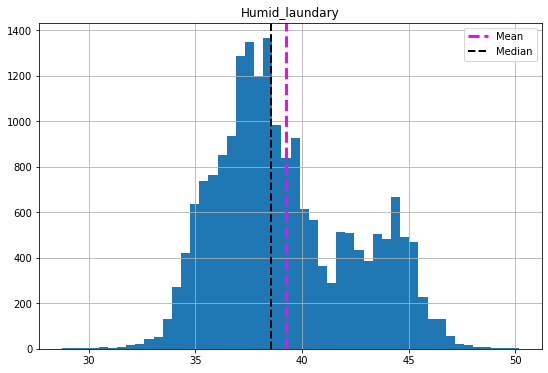

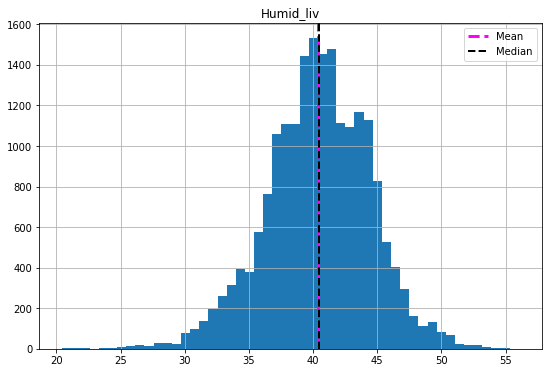

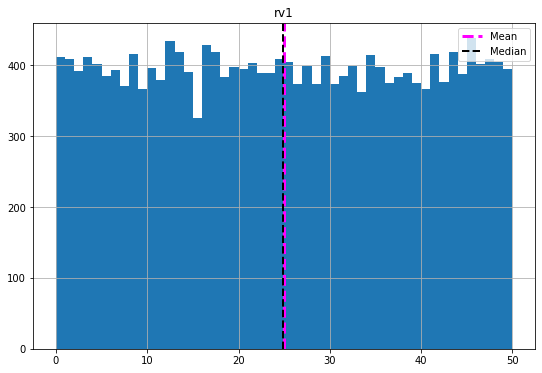

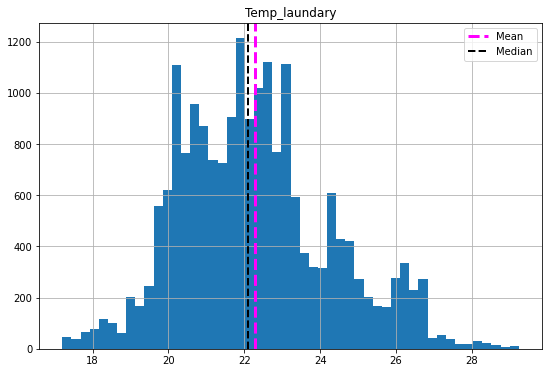

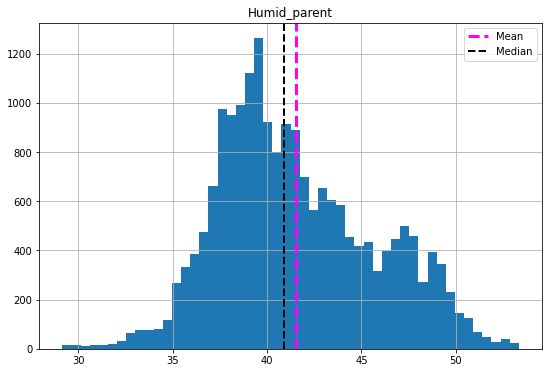

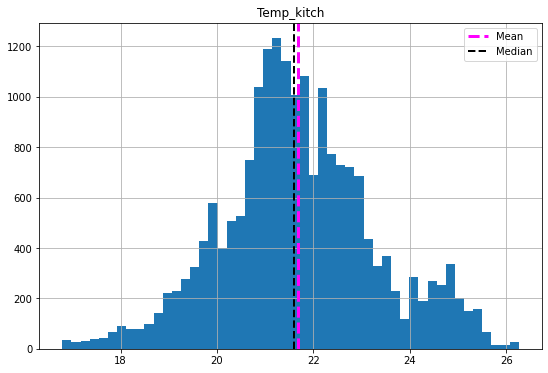

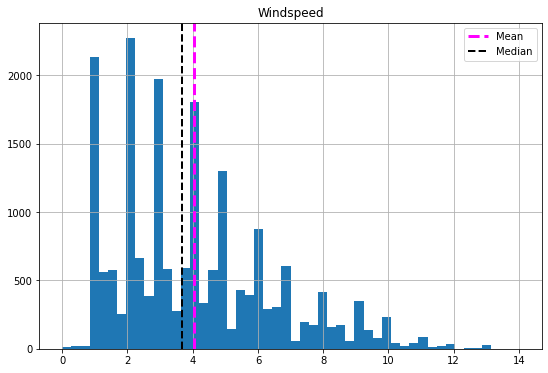

In [36]:
# Chart - 3 visualization code
for col in df[independent_variables]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=3,label='Mean')
    ax.axvline(feature.median(), color='black', linestyle='dashed', linewidth=2,label='Median')    
    ax.set_title(col)
    ax.legend()
plt.show()


##### 1. Why did I pick the specific chart?

* we want see the distribution of our numerical features about Mean and median
* We can see skewness of each variable.




#####  Insights
* Most of the vavriables are somewhat of positively skewed
* For variables like Humid_liv, Temp_teen, Temp_kitch we can say that they are following normal distribution(Gaussian).
* Press_mm_hg,Rh_out are negatively skewed

* **Chart - 4(Regression Plot)**

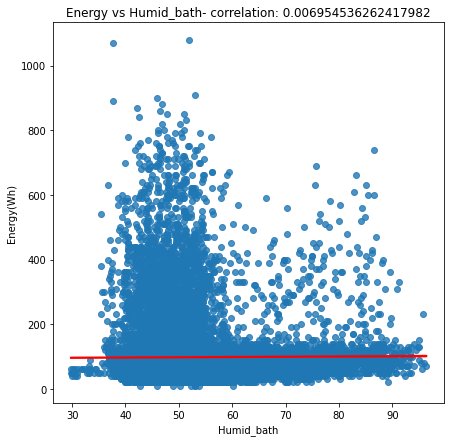

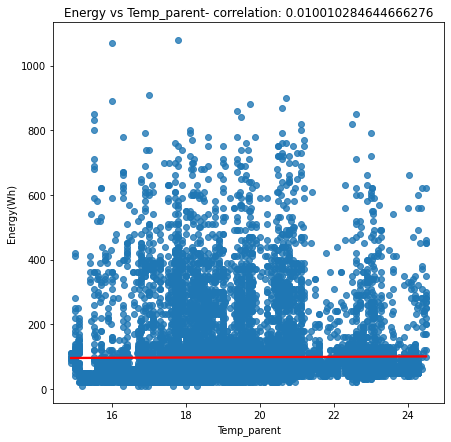

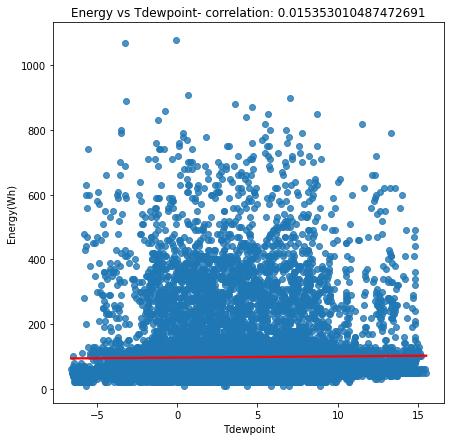

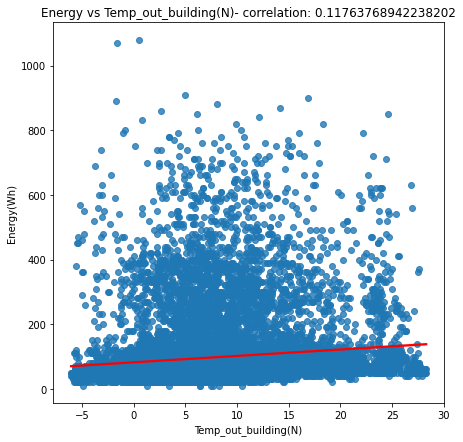

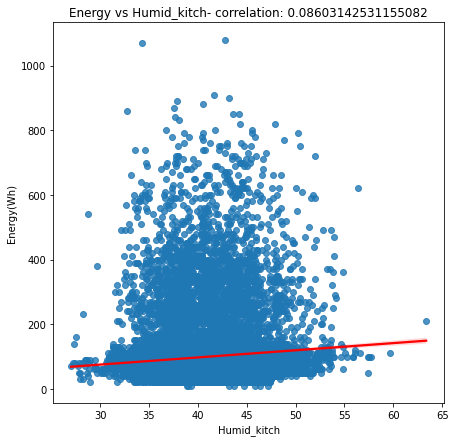

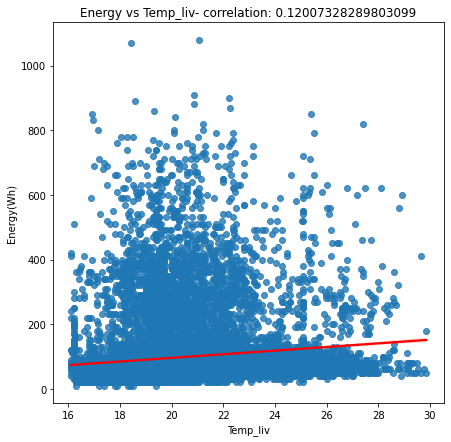

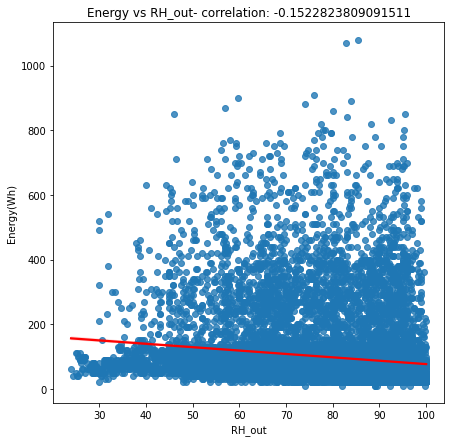

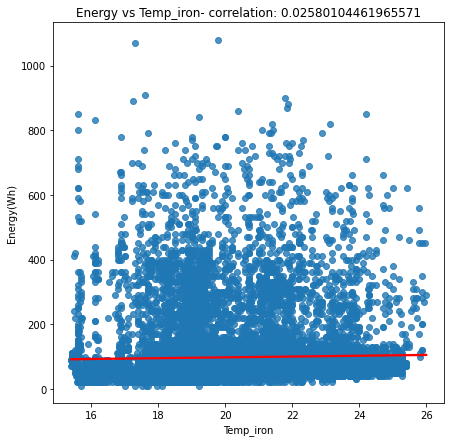

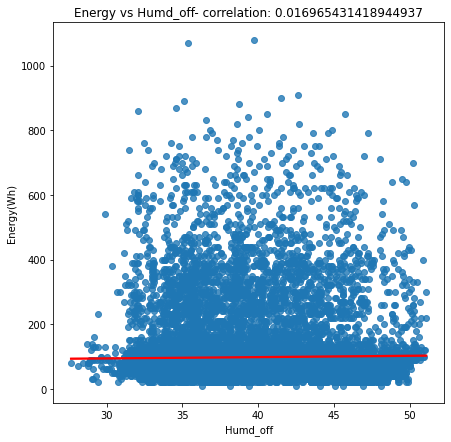

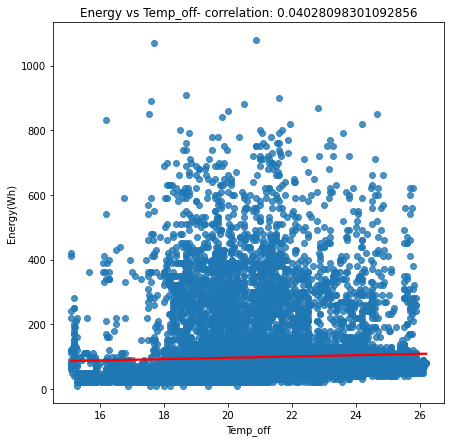

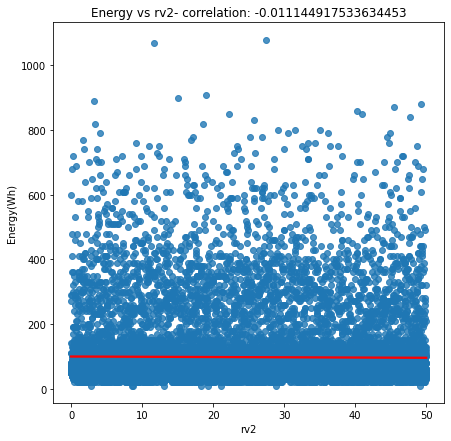

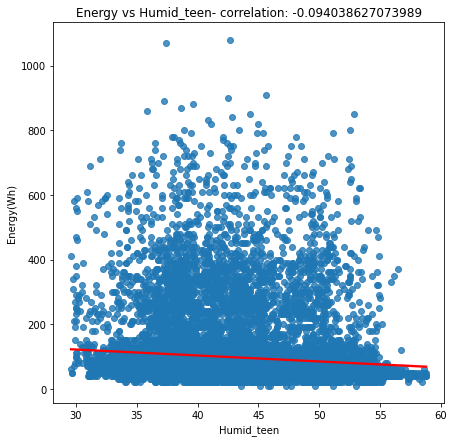

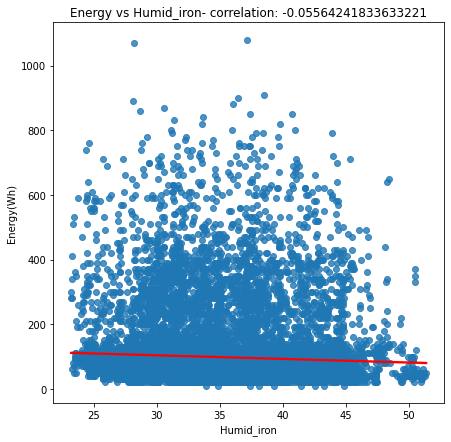

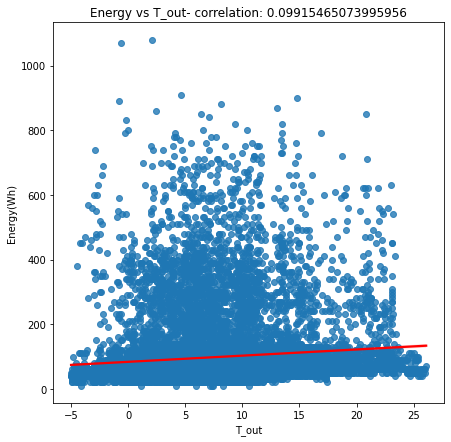

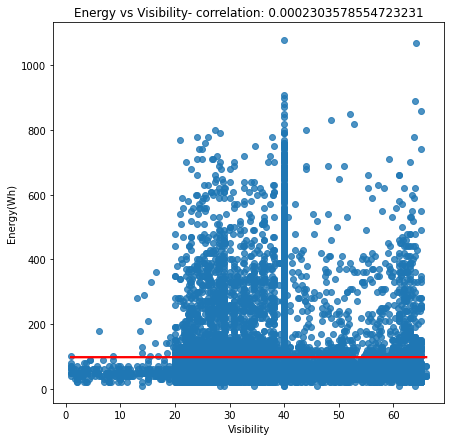

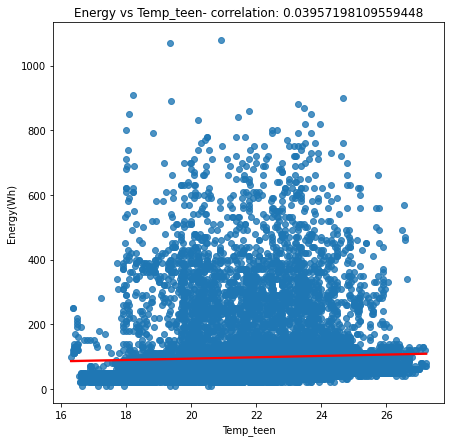

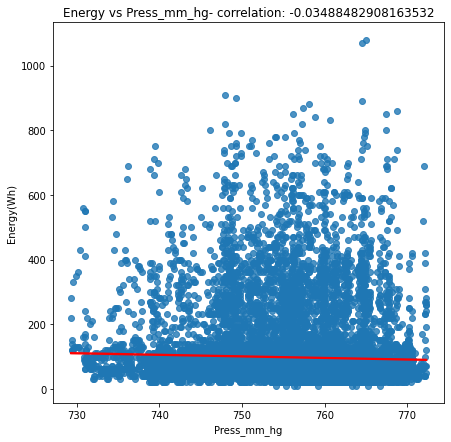

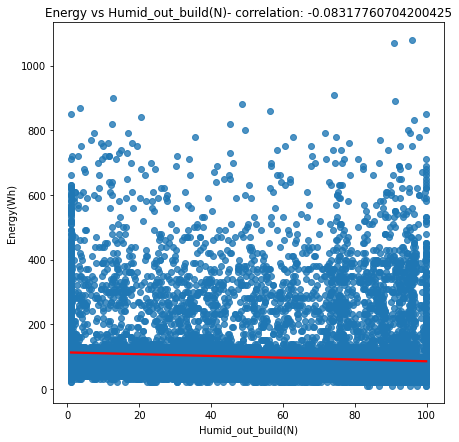

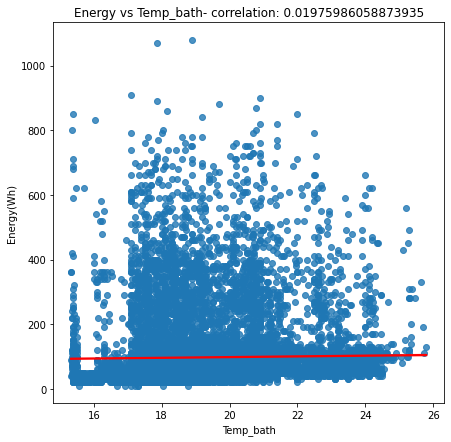

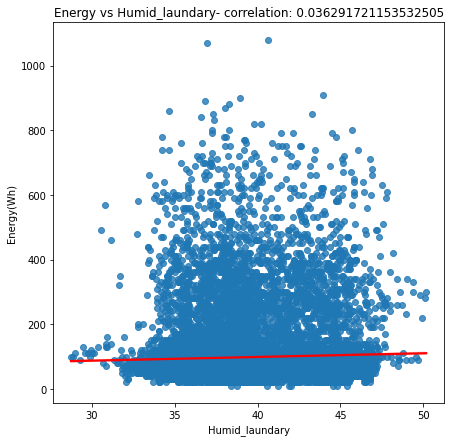

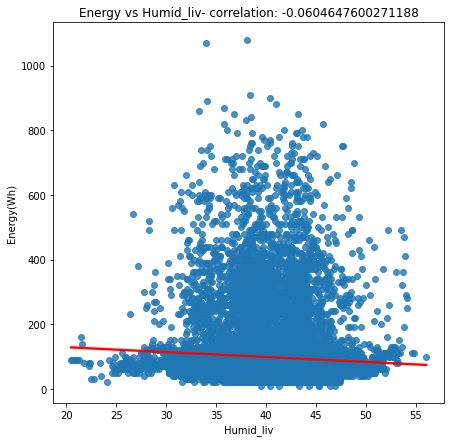

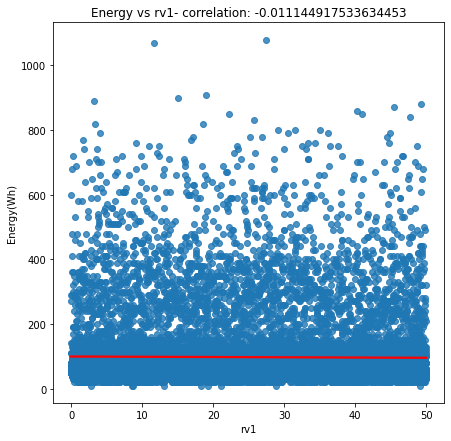

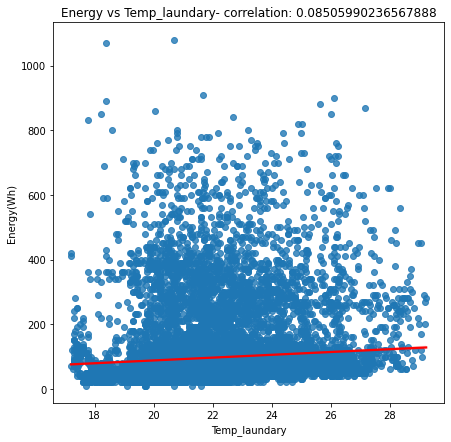

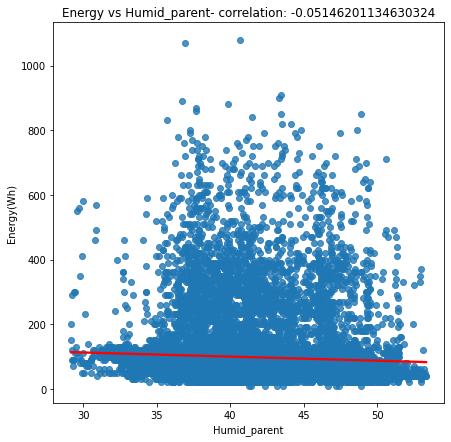

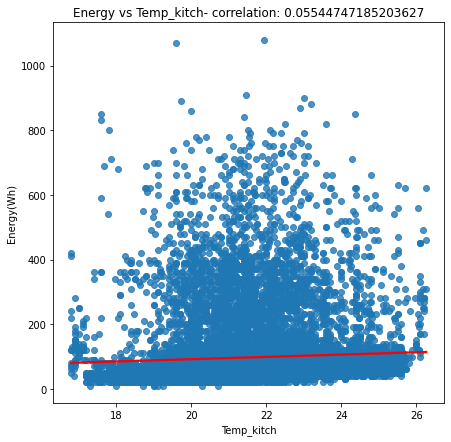

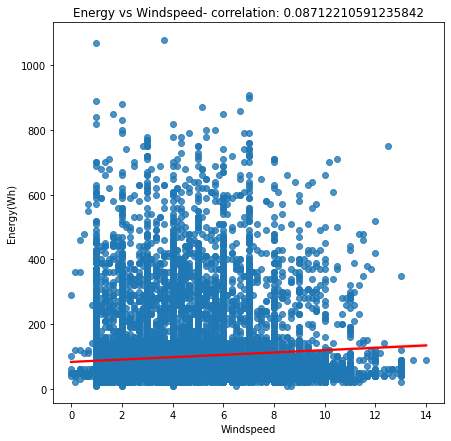

In [37]:
# Chart - 4 visualization code
for col in dataset[independent_variables]:
    fig = plt.figure(figsize=(7,7))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Energy(Wh)']
    correlation = feature.corr(label)
    sns.regplot(x=feature, y=label,line_kws={"color": "red"})
    plt.xlabel(col)
    plt.ylabel('Energy(Wh)')
    ax.set_title('Energy vs ' + col + '- correlation: ' + str(correlation))

##### 1. Why did you pick the specific chart?

We Want to see weather our independent variables have linear relationship with our dependent variables.

##### 2. What is/are the insight(s) found from the chart?

* Doesn't Find any strong linear relationship between both variables(dependent and independent variables).
* Column of random variables does not impact the target variable(uniform distribution) that's why droping both random variables. 


In [38]:
#Droping the columns
df=df.drop(['rv2','rv1',],axis=1)

In [39]:
# Removing these variables from independent variables too
independent_variables.remove('rv1')
independent_variables.remove('rv2')

* **Chart - 5(Checking Outliers)**

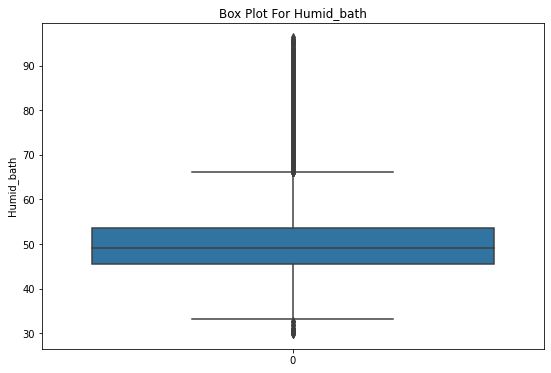

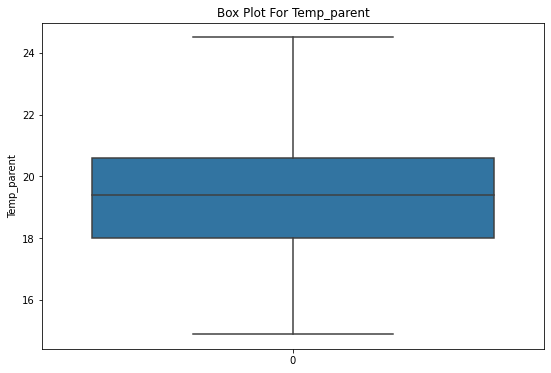

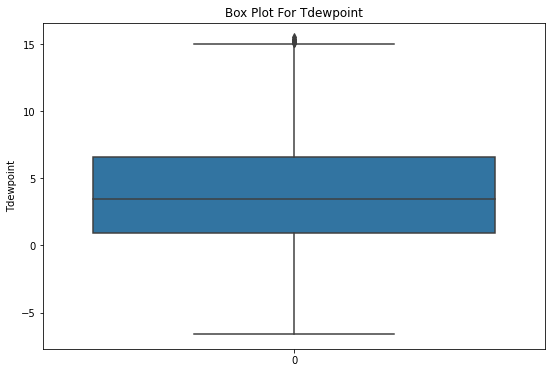

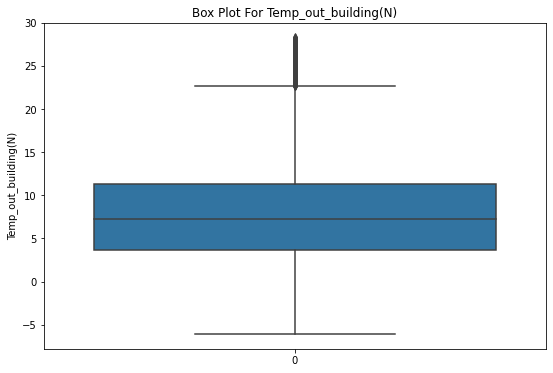

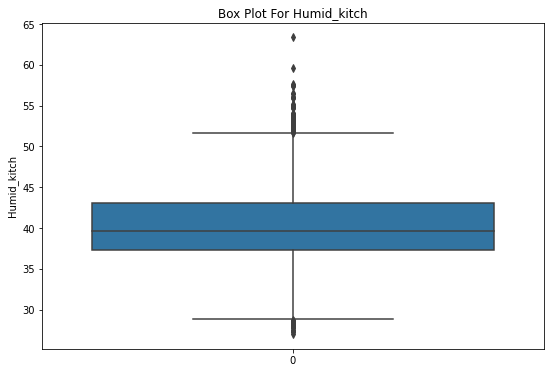

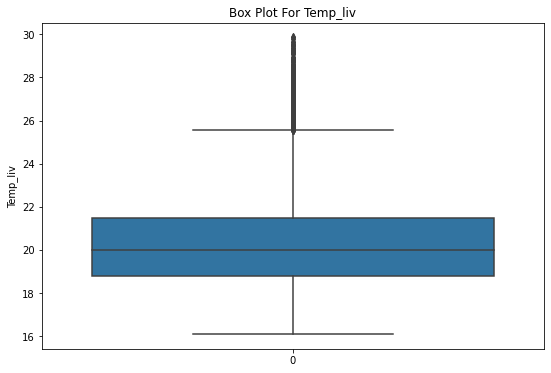

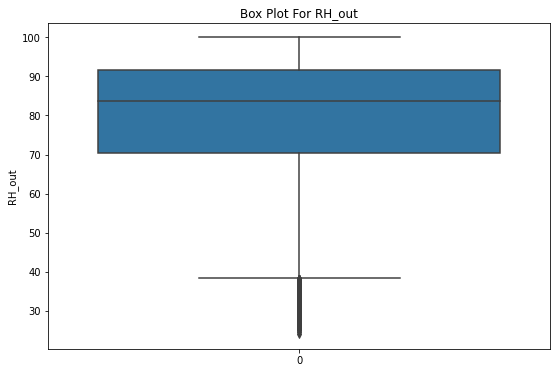

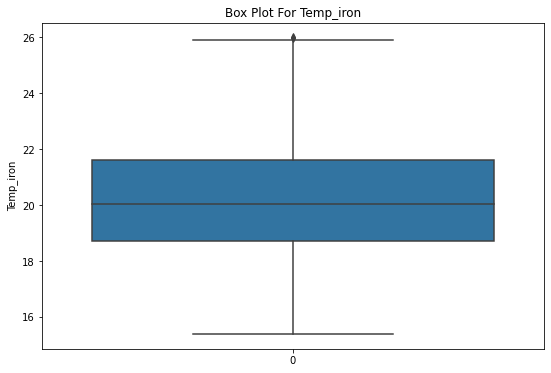

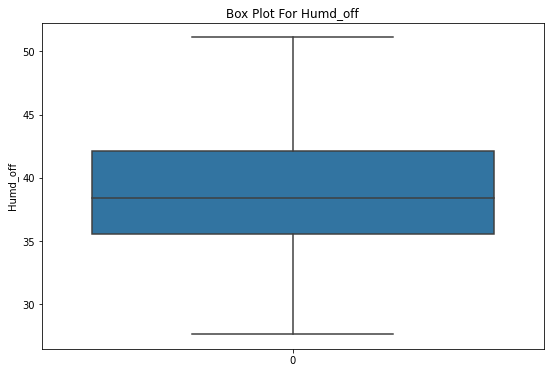

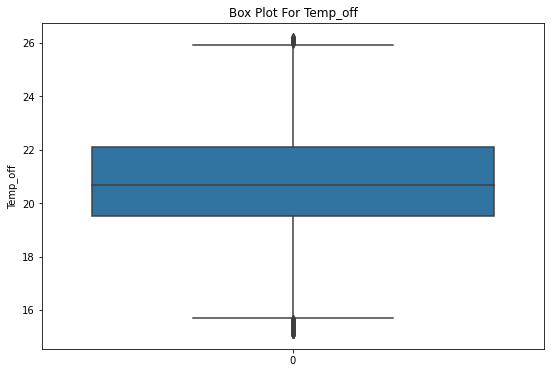

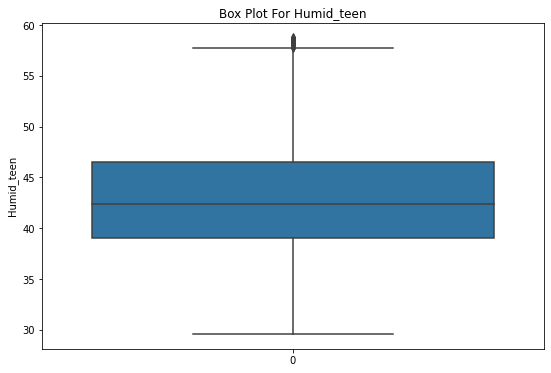

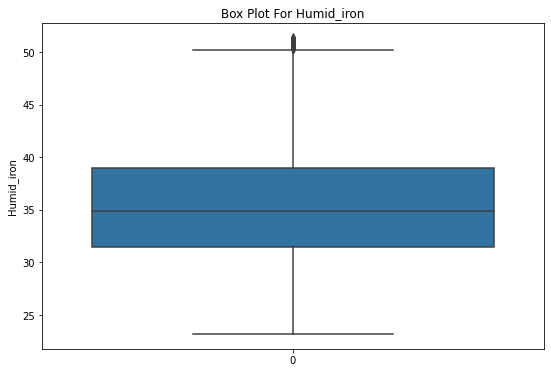

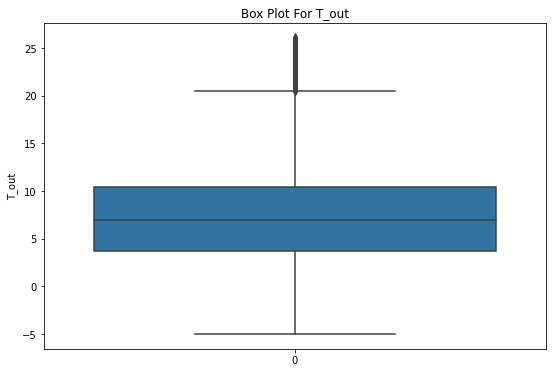

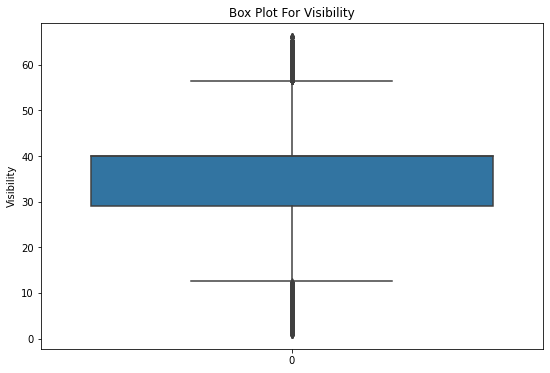

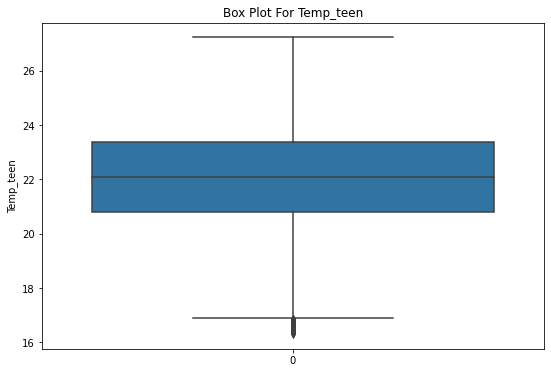

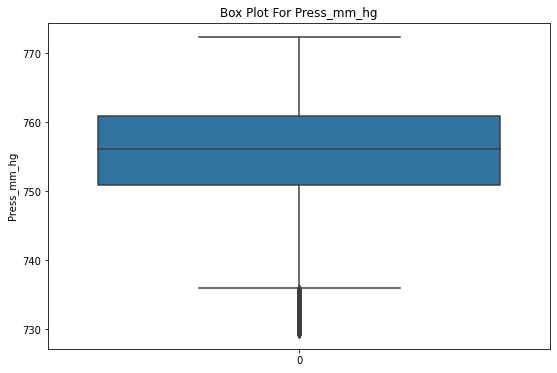

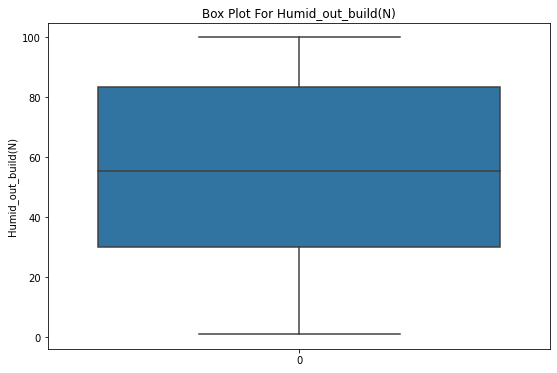

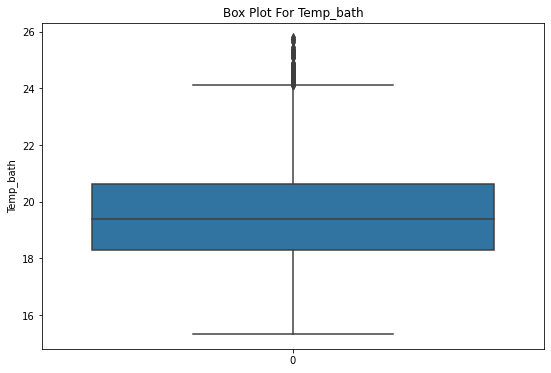

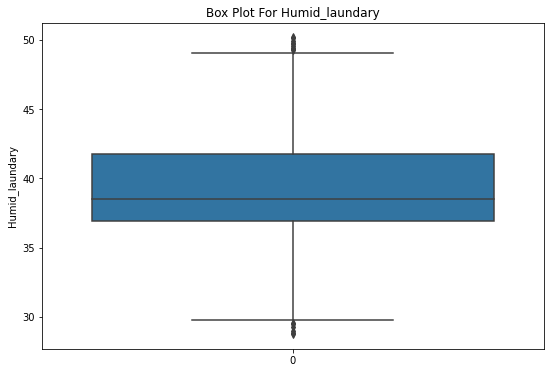

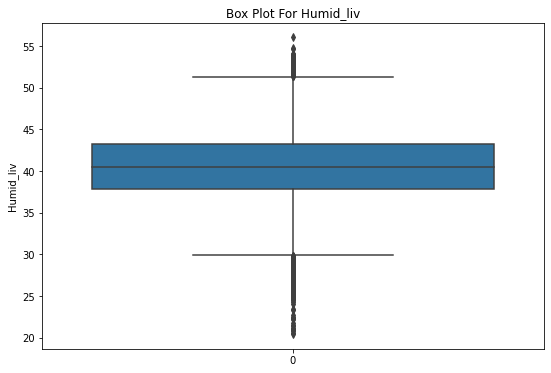

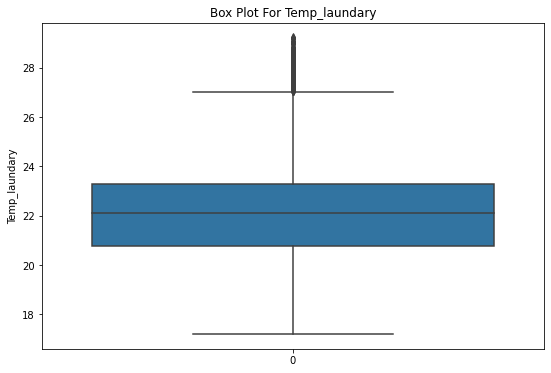

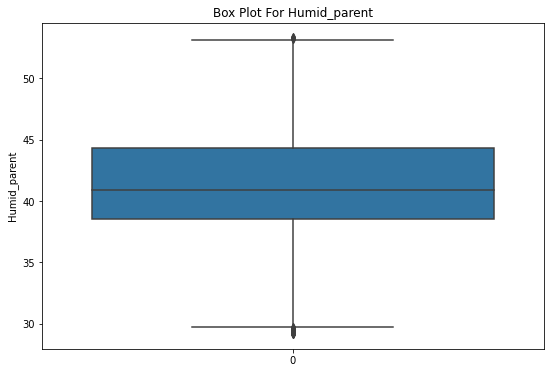

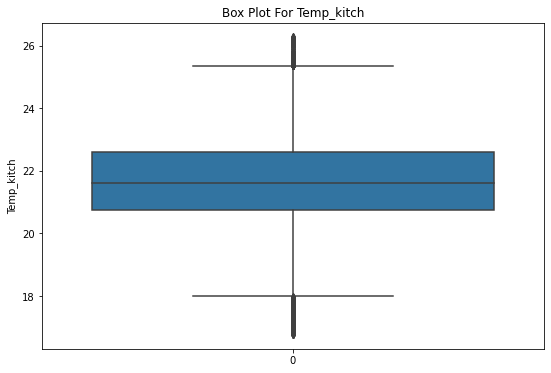

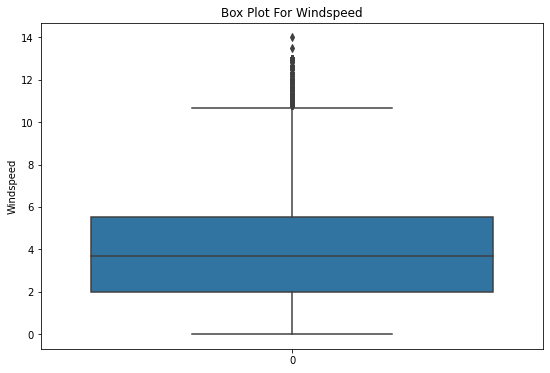

In [40]:
# Chart - 5 visualization code
for col in df[independent_variables]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(data=df[col])
    ax.set_title('Box Plot For ' + col)
    ax.set_ylabel(col)
plt.show()

In [41]:
df.shape

(19735, 26)

In above box plot we see some outliers in 'Temp_bath', 'presure_mm_hg, Humid_kitch, temp_kitch, Humid_bath,temp_liv, temp_laundary, T_out, Windspeed,  visibility, RH_out, Humid_liv.

* **Removing Outliers from above columns!**

In [42]:
# Mentioning those rows which have outliers
cols = ['Temp_bath', 'Press_mm_hg', 'Humid_kitch', 'Temp_kitch', 'Humid_bath', 'Temp_liv', 'Temp_laundary', 'T_out', 'Windspeed', 'Visibility', 'RH_out', 'Humid_liv']

* **Removing outliers using IQR Method**

In [43]:
#Calculate the IQR for each column using the quantile() function
def remove_outliers_iqr(df, col):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + (1.5 * IQR)
        lower_limit = Q1 - (1.5 * IQR)
        df = df[(df[col] > lower_limit) & (df[col] < upper_limit)]
    return df


In [44]:
#Removing Outliers
df_final=remove_outliers_iqr(df,cols)

In [45]:
#Final shape
df_final.shape

(14551, 26)

* **Remember removing outliers can impact on distributions, Let's check again the distributions of independent variables.**

array([[<Axes: title={'center': 'Humid_bath'}>,
        <Axes: title={'center': 'Temp_parent'}>,
        <Axes: title={'center': 'Tdewpoint'}>,
        <Axes: title={'center': 'Temp_out_building(N)'}>,
        <Axes: title={'center': 'Humid_kitch'}>],
       [<Axes: title={'center': 'Temp_liv'}>,
        <Axes: title={'center': 'RH_out'}>,
        <Axes: title={'center': 'Temp_iron'}>,
        <Axes: title={'center': 'Humd_off'}>,
        <Axes: title={'center': 'Temp_off'}>],
       [<Axes: title={'center': 'Humid_teen'}>,
        <Axes: title={'center': 'Humid_iron'}>,
        <Axes: title={'center': 'T_out'}>,
        <Axes: title={'center': 'Visibility'}>,
        <Axes: title={'center': 'Temp_teen'}>],
       [<Axes: title={'center': 'Press_mm_hg'}>,
        <Axes: title={'center': 'Humid_out_build(N)'}>,
        <Axes: title={'center': 'Temp_bath'}>,
        <Axes: title={'center': 'Humid_laundary'}>,
        <Axes: title={'center': 'Humid_liv'}>],
       [<Axes: title={'center':

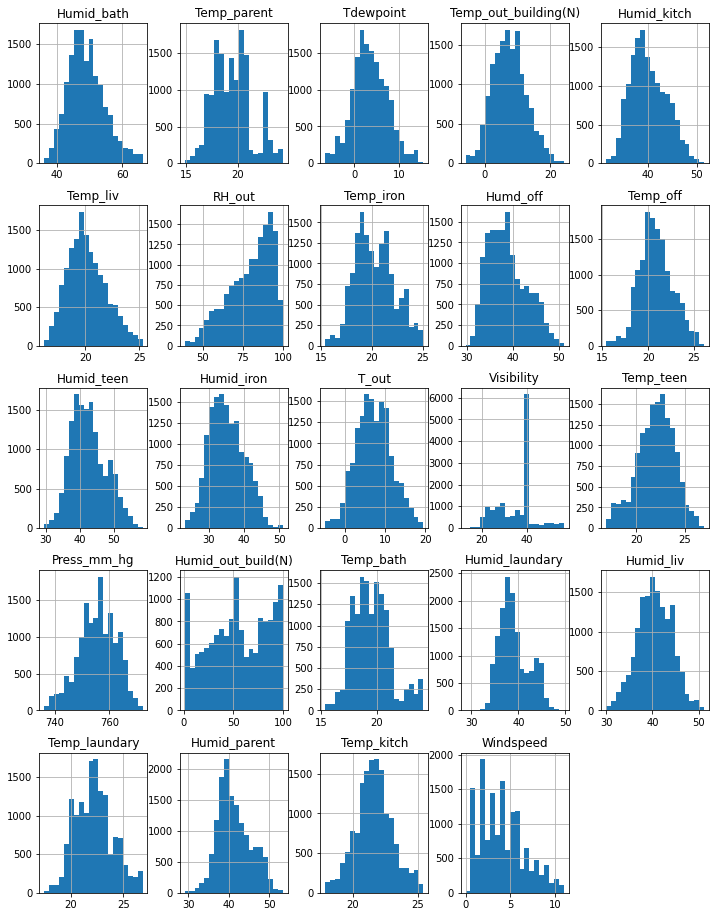

In [46]:
df_final[independent_variables].hist(bins = 20 , figsize= (12,16))

As we know that most of the columns are numeric in feature but we can use date column as categoricasl data and use it as a feature.

So let's first analyize how Energy of appliances changes with month,day and maybe time.

In [47]:

# making new columns and dropping date column
df_final['month'] = df_final['date'].dt.month
df_final['week_name'] = df_final['date'].dt.day_name()
df_final['hour'] = df_final['date'].dt.hour
df_final.drop(['date'], axis=1,inplace=True)

In [48]:
df_final.shape

(14551, 28)

In [49]:
df_final.head(3)

Energy(Wh)  Temp_kitch  Humid_kitch   Temp_liv  Humid_liv  Temp_laundary  \
33         390        21.6        44.56  20.963333  43.963333           20.5   
34         240        21.6        44.36  21.000000  43.833333           20.5   
35          60        21.6        44.20  21.000000  43.700000           20.5   

    Humid_laundary   Temp_off   Humd_off  Temp_bath  ...  Humid_parent  T_out  \
33           45.79  20.096667  47.566667  19.158333  ...     44.522500   5.75   
34           45.73  20.596667  47.223333  19.200000  ...     44.433333   5.80   
35           45.59  20.996667  47.030000  19.222500  ...     44.500000   5.85   

    Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  month  \
33   736.050000  87.500000   6.500000        40.0   3.750000      1   
34   736.133333  87.333333   6.666667        40.0   3.766667      1   
35   736.216667  87.166667   6.833333        40.0   3.783333      1   

    week_name  hour  
33     Monday    22  
34     Monday    22  
35     Monday    22  

[3 rows x 28 columns]

## ***Energy consumption***

In [50]:
energy_by_month=df_final.groupby('month').agg({'Energy(Wh)':'mean'}).sort_values(by='Energy(Wh)',ascending=False).reset_index()
energy_by_month


month  Energy(Wh)
0      2  104.191576
1      3  100.758784
2      4   97.026674
3      1   89.411466
4      5   80.358763

<Axes: xlabel='month', ylabel='Energy(Wh)'>

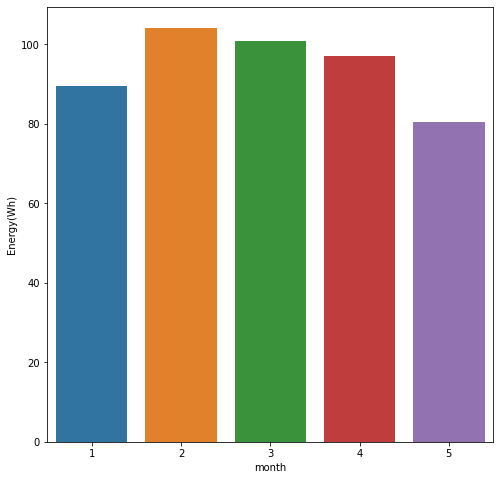

In [51]:
plt.figure(figsize=(8,8))
sns.barplot(data=energy_by_month, x="month", y="Energy(Wh)")

* **Dataset has energy consumption of 4.5 months only that's why energy consumption of 5th month is lowest.Although we can say that Energy Consumption in every month is somewhat of same.**

In [52]:
energy_by_weekname=df_final.groupby('week_name').agg({'Energy(Wh)':'mean'}).sort_values(by='Energy(Wh)',ascending=False).reset_index()
energy_by_weekname

week_name  Energy(Wh)
0     Monday  114.468691
1     Friday  100.540153
2   Saturday   99.214686
3     Sunday   90.849478
4   Thursday   89.611399
5  Wednesday   89.484040
6    Tuesday   84.939815

<Axes: xlabel='week_name', ylabel='Energy(Wh)'>

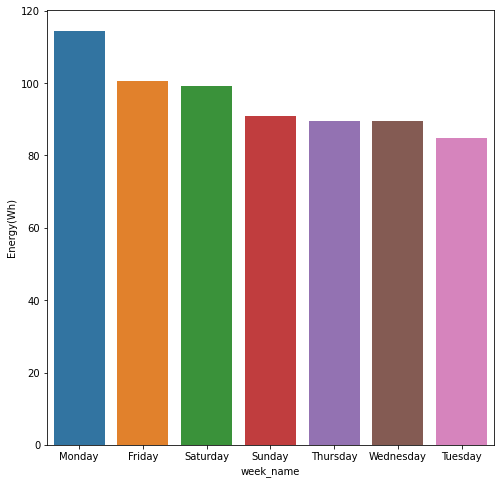

In [53]:
plt.figure(figsize=(8,8))
sns.barplot(data=energy_by_weekname, x="week_name", y="Energy(Wh)")

* **Consumption on Monday is highest and lowest is on Tuesday.**
* **We can use this column as categorical feature and later assign values each value in column.**

In [54]:
energy_by_hour=df_final.groupby('hour').agg({'Energy(Wh)':'mean'}).reset_index()
energy_by_hour

hour  Energy(Wh)
0      0   53.546218
1      1   51.929012
2      2   49.428130
3      3   48.453125
4      4   50.000000
5      5   54.197138
6      6   58.887097
7      7   81.530945
8      8  104.033333
9      9  109.981982
10    10  117.225225
11    11  124.105090
12    12  118.075117
13    13  120.814696
14    14  108.291925
15    15  107.282443
16    16  121.910632
17    17  161.124807
18    18  193.423138
19    19  139.856373
20    20  115.450902
21    21   85.150301
22    22   65.333333
23    23   56.705882

Text(0.5, 0, 'hour')

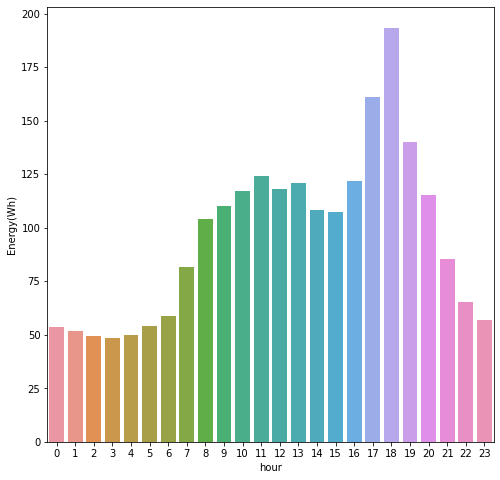

In [55]:
plt.figure(figsize=(8,8))
sns.barplot(data=energy_by_hour, x="hour", y="Energy(Wh)")
plt.xlabel('hour')

Above figure is a representation of average energy consumption of appliances at different time of the day over a period of 4.5 months. We observe two peak hours. One at 11 am in the morning and other at 6 PM in the evening. While the peak at 11 am is low, peak at 6 PM is comparatively higher.

After about 6 AM, energy consumption starts to rise gradually up until 11 AM. And then gradually decreases to around 100 Wh at about 3 PM. After which the energy consumption drastically shoots up up until 6 PM in the evening (probably due to requirement lights in rooms). 

Now we want see weather it is happening every month.

In [56]:
energy_by_month_hour=df_final.groupby(['month','hour']).agg({'Energy(Wh)':'mean'}).reset_index()
energy_by_month_hour

month  hour  Energy(Wh)
0        1     0   61.333333
1        1     1   50.833333
2        1     2   41.515152
3        1     3   39.642857
4        1     4   42.435897
..     ...   ...         ...
115      5    19  117.142857
116      5    20  129.846154
117      5    21   76.000000
118      5    22   59.389313
119      5    23   60.069444

[120 rows x 3 columns]

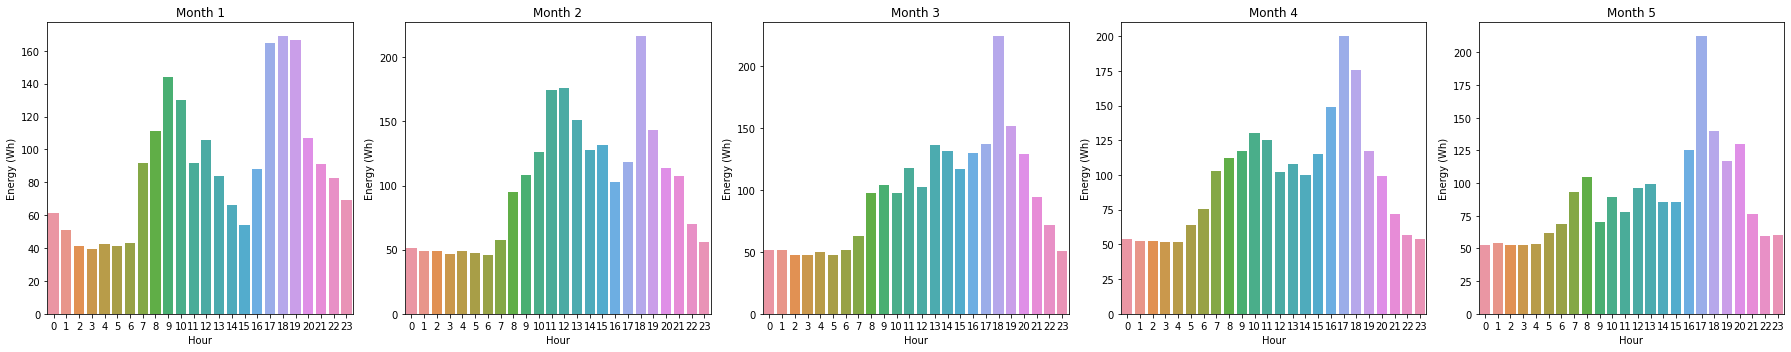

In [57]:
# Create a 1x5 grid of subplots
# Set the figure size
fig, axs = plt.subplots(1, 5, figsize=(25, 5))

# Loop over each month and create a bar plot in the corresponding subplot
for i, month in enumerate(energy_by_month_hour['month'].unique()):
    month_data = energy_by_month_hour[energy_by_month_hour['month'] == month]
    sns.barplot(x='hour', y='Energy(Wh)', data=month_data, ax=axs[i])
    axs[i].set_xlabel('Hour')
    axs[i].set_ylabel('Energy (Wh)')
    axs[i].set_title(f'Month {month}')

# Adjust the layout of the subplots and display the plot
plt.tight_layout()
plt.show()

We Observe that trend is same for each month, We can say that month will not play an important role for predicting the energy hence droping the month column. 

In [58]:
df_final=df_final.drop('month',axis=1)

Let's Check each week of the day for period of 5 months

In [59]:
energy_by_week_hour=df_final.groupby(['week_name','hour']).agg({'Energy(Wh)':'mean'}).reset_index()
energy_by_week_hour

week_name  hour  Energy(Wh)
0       Friday     0   50.389610
1       Friday     1   50.921053
2       Friday     2   49.418605
3       Friday     3   48.282828
4       Friday     4   49.306931
..         ...   ...         ...
163  Wednesday    19  160.674157
164  Wednesday    20  139.857143
165  Wednesday    21   74.583333
166  Wednesday    22   58.082192
167  Wednesday    23   54.404762

[168 rows x 3 columns]

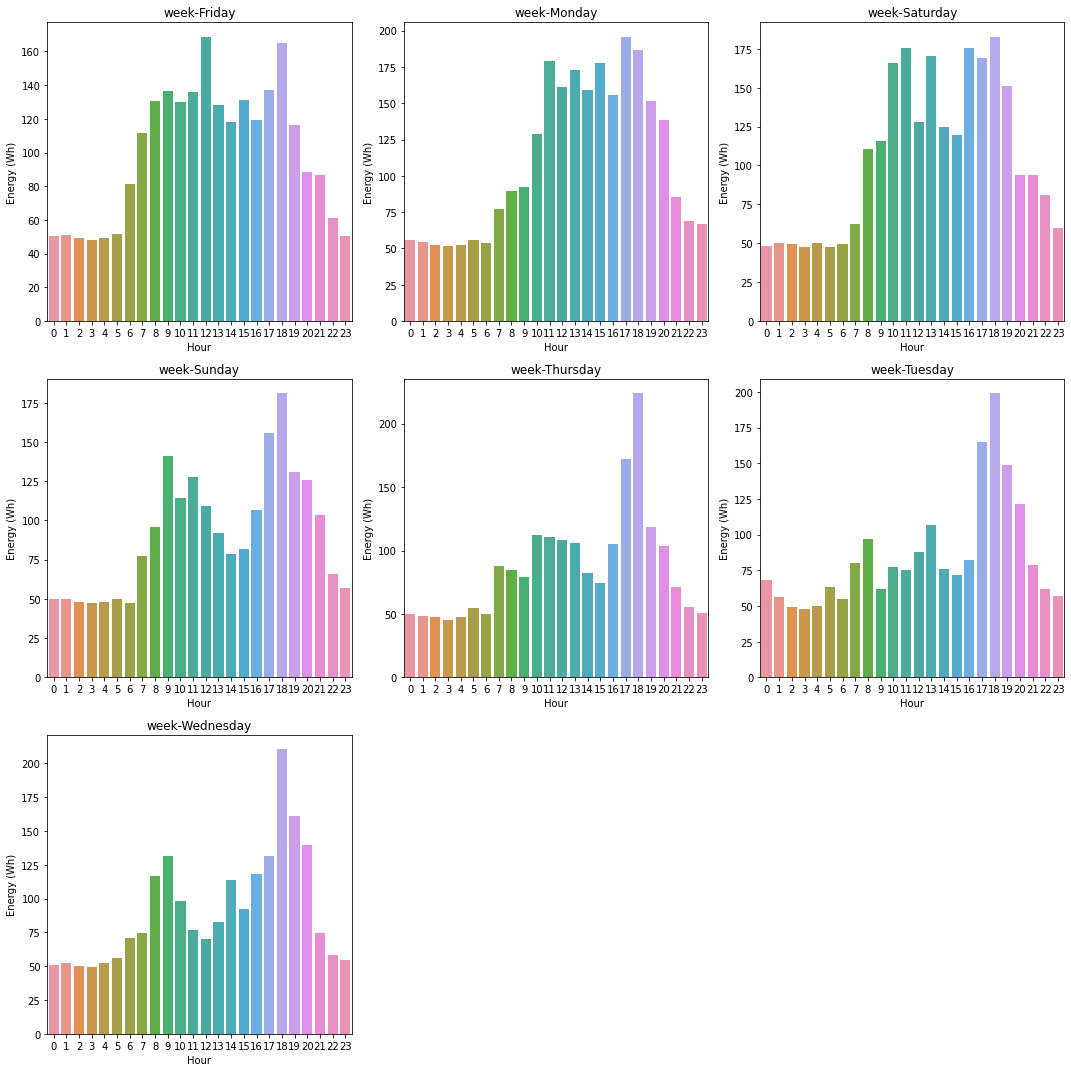

In [60]:
# Create a 1x5 grid of subplots
# Set the figure size
fig, axs = plt.subplots(3, 3, figsize=(15,15))

# Loop over each month and create a bar plot in the corresponding subplot
for i, week in enumerate(energy_by_week_hour['week_name'].unique()):
    week_data = energy_by_week_hour[energy_by_week_hour['week_name'] == week]
    sns.barplot(x='hour', y='Energy(Wh)', data=week_data, ax=axs[i//3,i%3])
    axs[i//3,i%3].set_xlabel('Hour')
    axs[i//3,i%3].set_ylabel('Energy (Wh)')
    axs[i//3,i%3].set_title(f'week-{week}')
# Hide any unused subplots
for i, ax in enumerate(axs.flatten()):
    if i >= len(energy_by_week_hour['week_name'].unique()):
        ax.axis('off')

# Adjust the layout of the subplots and display the plot
plt.tight_layout()
plt.show()





After analyzing the above graphs,we can say that energy consumption goes higher in the office hour on week Friday,Monday and Saturday. For this we have to see correlation heat map.


## ***Let's Check the other features in the dataset like Temperature and Humidity***

We know Temperature increases relative humidity decreases. so there may be the case this trend is happening!

In [61]:
df_final.columns

Index(['Energy(Wh)', 'Temp_kitch', 'Humid_kitch', 'Temp_liv', 'Humid_liv',
       'Temp_laundary', 'Humid_laundary', 'Temp_off', 'Humd_off', 'Temp_bath',
       'Humid_bath', 'Temp_out_building(N)', 'Humid_out_build(N)', 'Temp_iron',
       'Humid_iron', 'Temp_teen', 'Humid_teen', 'Temp_parent', 'Humid_parent',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'week_name', 'hour'],
      dtype='object')

In [62]:
temp_lst=['Temp_kitch','Temp_liv','Temp_laundary','Temp_off','Temp_bath','Temp_out_building(N)','Temp_iron','Temp_teen','Temp_parent','T_out','Tdewpoint','hour']

In [63]:
temp_df=df_final[temp_lst]

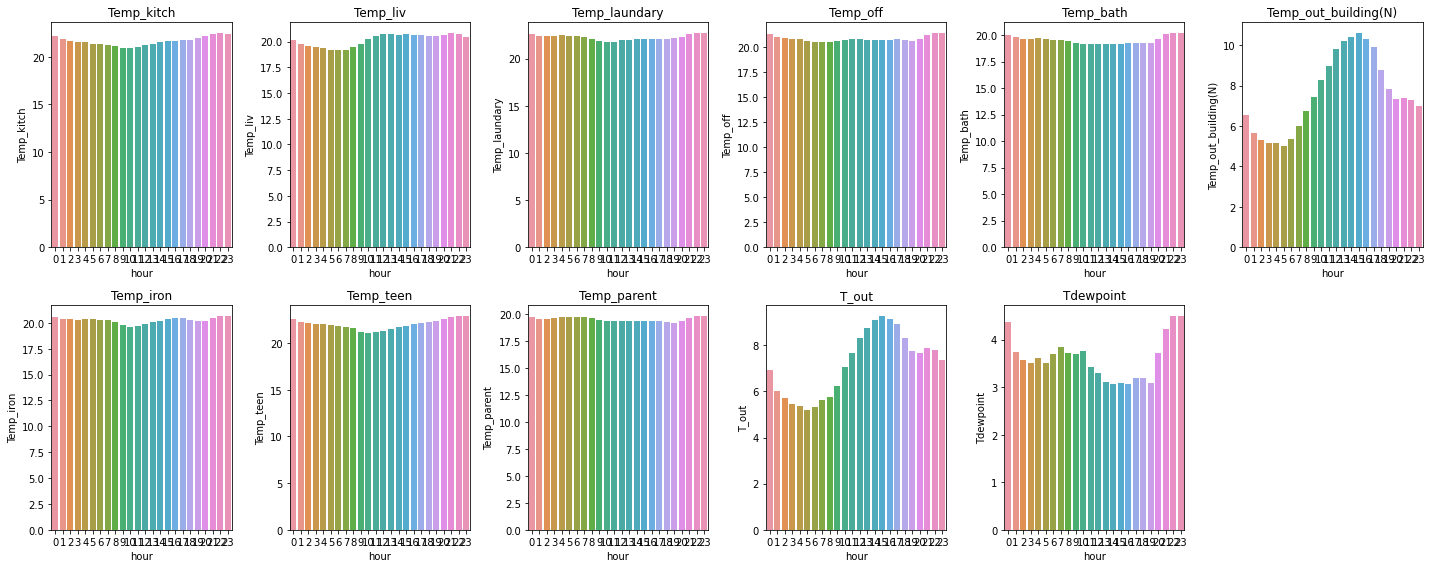

In [64]:
# Select the relevant columns from the dataframe
temp_df = df_final[temp_lst]

# Group the data by hour and calculate the mean temperature for each hour
temp_means = temp_df.groupby('hour').mean()

# Set up the subplot grid
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(20,8))

# Flatten the 2D axes array into a 1D list
axes = axes.flatten()

# Loop over each column in the dataframe and create a barplot
for i, col in enumerate(temp_means.columns):
    # Determine the subplot index for this column
    subplot_index = i % 12
    
    # Create the barplot on the appropriate subplot
    sns.barplot(x=temp_means.index, y=col, data=temp_means, ax=axes[subplot_index])
    axes[subplot_index].set_title(col)
    
# Hide any unused subplots
for i, ax in enumerate(axes.flatten()):
    if i >= len(temp_means.columns):
      ax.axis('off')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

* **Temperature Levels in all rooms are same, We can also see that Temperatures are somewhat of same for each hour of the day too (This can help us in feature engineering)**
* **Outside buildind temperature and outside station temperature following same trend.**

In [65]:
humid_lst=['Humid_kitch','Humid_liv','Humid_laundary','Humd_off','Humid_bath','Humid_out_build(N)','Humid_iron','Humid_teen','Humid_parent','RH_out','hour']

In [66]:
humid_df=df_final[humid_lst]

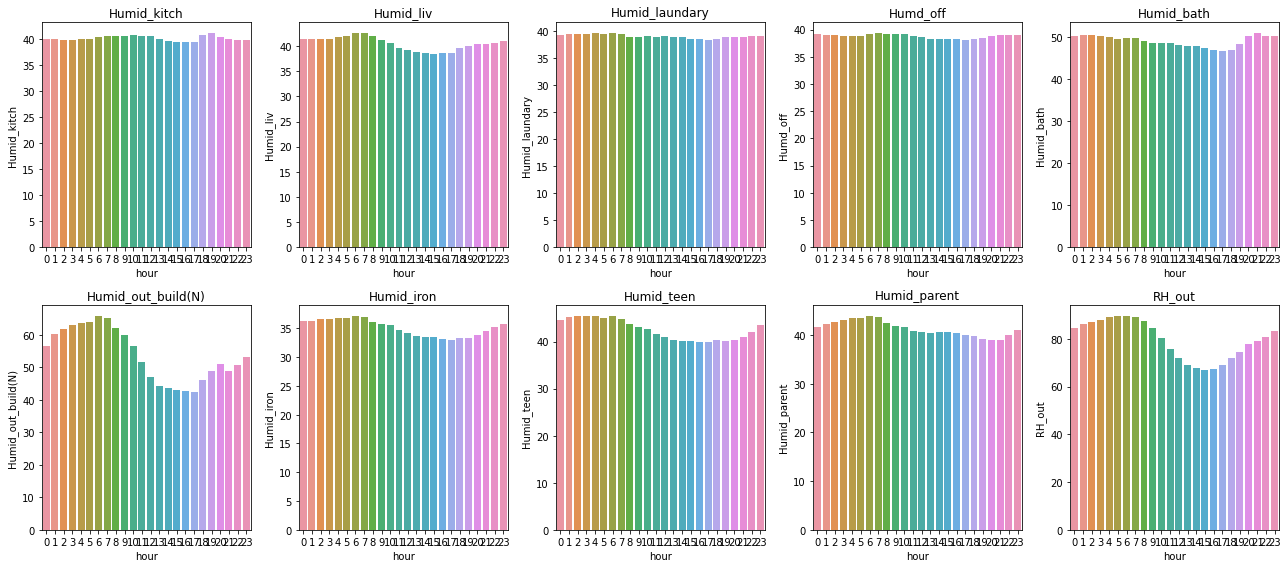

In [67]:
# Select the relevant columns from the dataframe
humid_df = df_final[humid_lst]

# Group the data by hour and calculate the mean humid for each hour
humid_means = humid_df.groupby('hour').mean()

# Set up the subplot grid
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18,8))



# Loop over each column in the dataframe and create a barplot(without flatenning the axis array)
for i, col in enumerate(humid_means.columns):
    # Determine the subplot index for this column
    row_index = i // 5
    column_index=i%5
    
    # Create the barplot on the appropriate subplot
    sns.barplot(x=humid_means.index, y=col, data=humid_means, ax=axes[row_index,column_index])
    axes[row_index,column_index].set_title(col)
    

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


* **As we can see that the temperature levels and humidity levels in most of the rooms are constant but temperature outside the building and outside the station gradually increases and then decreases over the period of 4.5 months. Also the humidity also changes but in opposite manner in both the cases.** 


## ***Correlation Heatmap,Feature Engineering & Data Pre-processing***

In [68]:
df_final.head()

Energy(Wh)  Temp_kitch  Humid_kitch   Temp_liv  Humid_liv  Temp_laundary  \
33         390        21.6        44.56  20.963333  43.963333        20.5000   
34         240        21.6        44.36  21.000000  43.833333        20.5000   
35          60        21.6        44.20  21.000000  43.700000        20.5000   
36          60        21.6        44.20  21.000000  43.590000        20.4175   
37          60        21.6        44.20  21.000000  43.590000        20.3900   

    Humid_laundary   Temp_off   Humd_off  Temp_bath  ...  Temp_parent  \
33       45.790000  20.096667  47.566667  19.158333  ...    16.890000   
34       45.730000  20.596667  47.223333  19.200000  ...    16.823333   
35       45.590000  20.996667  47.030000  19.222500  ...    16.890000   
36       45.545000  21.166667  46.526667  19.290000  ...    16.890000   
37       45.663333  21.033333  46.400000  19.290000  ...    16.890000   

    Humid_parent  T_out  Press_mm_hg     RH_out  Windspeed  Visibility  \
33     44.522500   5.75   736.050000  87.500000   6.500000        40.0   
34     44.433333   5.80   736.133333  87.333333   6.666667        40.0   
35     44.500000   5.85   736.216667  87.166667   6.833333        40.0   
36     44.500000   5.90   736.300000  87.000000   7.000000        40.0   
37     45.066667   5.80   736.400000  87.833333   6.833333        37.0   

    Tdewpoint  week_name  hour  
33   3.750000     Monday    22  
34   3.766667     Monday    22  
35   3.783333     Monday    22  
36   3.800000     Monday    23  
37   3.850000     Monday    23  

[5 rows x 27 columns]

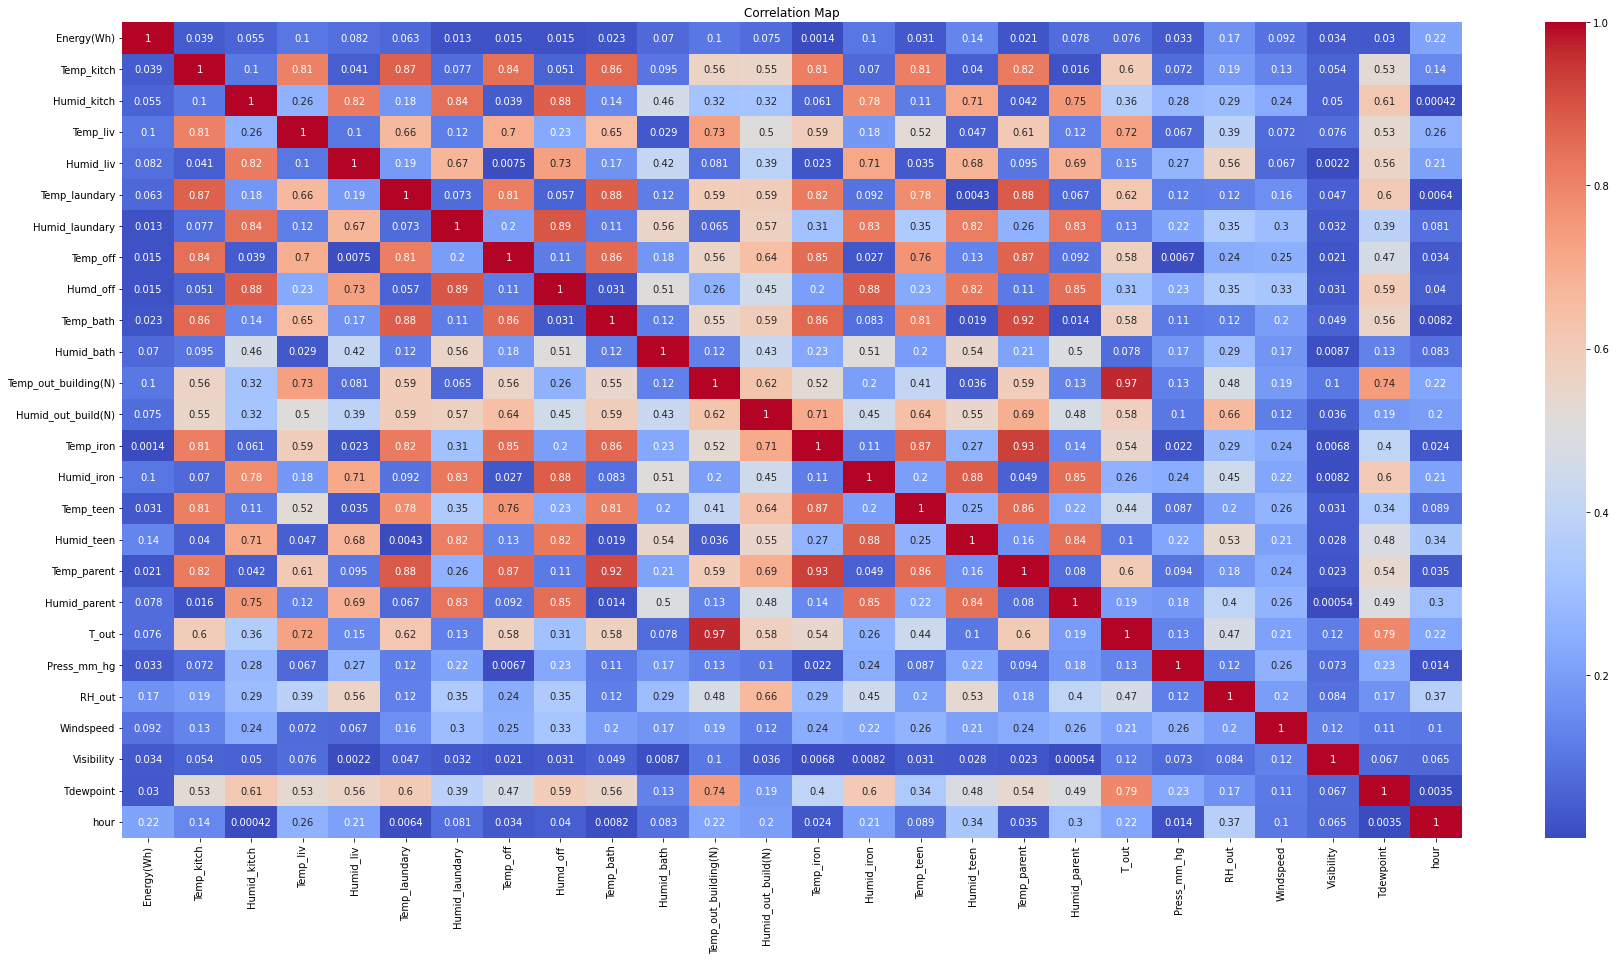

In [69]:
# Compute the correlation matrix
corr_matrix = df_final.corr()

# Set up the plot
fig = plt.figure(figsize=(30, 15))

# Create the heatmap
sns.heatmap(abs(corr_matrix), annot=True, cmap='coolwarm')

# Add plot title
plt.title('Correlation Map')

# Display the plot
plt.show()

* **Multicollineartiy exists in our dataset and that can affect badly our model prediction.**
* **Let's try to remove collinearity by doing some feature engineering.**

In [70]:
df_final.columns

Index(['Energy(Wh)', 'Temp_kitch', 'Humid_kitch', 'Temp_liv', 'Humid_liv',
       'Temp_laundary', 'Humid_laundary', 'Temp_off', 'Humd_off', 'Temp_bath',
       'Humid_bath', 'Temp_out_building(N)', 'Humid_out_build(N)', 'Temp_iron',
       'Humid_iron', 'Temp_teen', 'Humid_teen', 'Temp_parent', 'Humid_parent',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'week_name', 'hour'],
      dtype='object')

### Let's do some Feature Engineering

* **During our EDA we saw that Temperature Levels in rooms of the building are same, even at each hour of the day the temperatures are comprable for each room.**
* **We can take mean for each temperature values for that hour of the day.(Just like we are merging all the rooms in one).**
* **In same manner we can do tranformation for humidities values also.**
* **We can merge the outside(outside_building,station) temperature and humidity also.** **(Trend is same)**   

In [71]:
#Taking mean for temperature values for each rooms for that hour of the day
df_final['overall_temp']=df_final.loc[:,['Temp_kitch','Temp_liv','Temp_laundary','Temp_off','Temp_bath','Temp_iron','Temp_teen','Temp_parent']].apply(lambda x: x.mean(), axis=1)

In [72]:
#Taking mean for outside temperature values
df_final['outside_overall_temp']=df_final.loc[:,['Temp_out_building(N)','T_out']].apply(lambda x: x.mean(), axis=1)

In [73]:
#Droping the temperature columns
df_final=df_final.drop(['Temp_kitch','Temp_liv','Temp_laundary','Temp_off','Temp_bath','Temp_iron','Temp_teen','Temp_parent','Temp_out_building(N)','T_out'],axis=1)

In [74]:
#Taking mean for humidities values for each rooms for that hour of the day
df_final['overall_humidity']=df_final.loc[:,['Humid_kitch','Humid_liv','Humid_laundary','Humd_off','Humid_bath','Humid_iron','Humid_teen','Humid_parent']].apply(lambda x: x.mean(), axis=1)

In [75]:
#Taking mean for outside humidities values
df_final['outside_overall_humidity']=df_final.loc[:,['Humid_out_build(N)','RH_out']].apply(lambda x: x.mean(), axis=1)

In [76]:
#Droping the humidities columns
df_final=df_final.drop(['Humid_kitch','Humid_liv','Humid_laundary','Humd_off','Humid_bath','Humid_iron','Humid_teen','Humid_parent','Humid_out_build(N)','RH_out'],axis=1)

* **For Categorical feature(week_name) we are assigning the dummies values.** 

In [77]:
# create dummy variables for week_name
week_dummies = pd.get_dummies(df_final['week_name'])
# concatenate the original dataframe and the dummy variables
df_final = pd.concat([df_final, week_dummies], axis=1)

df_final.drop('week_name',axis=1,inplace=True)

* **Let's encode hour column too!**



In [78]:
# define the conditions for each group
cond1 = df_final['hour'].isin([0, 1, 2, 3, 4, 5, 6, 22, 23]) #Enegy consumption is lowest in these hour
cond2 = df_final['hour'].isin([7, 8, 9, 10, 11, 12, 13, 14, 15]) 
cond3 = ~(cond1 | cond2) #Energy consumption is highest in these hour

# define the values to assign for each condition
values = [1, 2, 3]

# encode the hour column based on the conditions
df_final['hour_encoded'] = np.select([cond1, cond2, cond3], values)




In [79]:
#Value counts for hour encoded
df_final['hour_encoded'].value_counts()

1    5570
2    5497
3    3484
Name: hour_encoded, dtype: int64

In [80]:
#Droping the hour column
df_final.drop('hour',axis=1,inplace=True)

In [81]:
#making the copy of our new dataset
df_final=df_final.copy()

In [82]:
df_final.head()

Energy(Wh)  Press_mm_hg  Windspeed  Visibility  Tdewpoint  overall_temp  \
33         390   736.050000   6.500000        40.0   3.750000     19.548542   
34         240   736.133333   6.666667        40.0   3.766667     19.606250   
35          60   736.216667   6.833333        40.0   3.783333     19.649896   
36          60   736.300000   7.000000        40.0   3.800000     19.677604   
37          60   736.400000   6.833333        37.0   3.850000     19.661667   

    outside_overall_temp  overall_humidity  outside_overall_humidity  Friday  \
33              5.825000         46.312292                 86.266667       0   
34              5.900000         46.143333                 85.730000       0   
35              5.925000         46.049583                 85.613333       0   
36              5.933333         45.972708                 85.895000       0   
37              5.850000         46.112500                 86.715000       0   

    Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  hour_encoded  
33       1         0       0         0        0          0             1  
34       1         0       0         0        0          0             1  
35       1         0       0         0        0          0             1  
36       1         0       0         0        0          0             1  
37       1         0       0         0        0          0             1

* **Let's see now how are correlation heat map looks like**

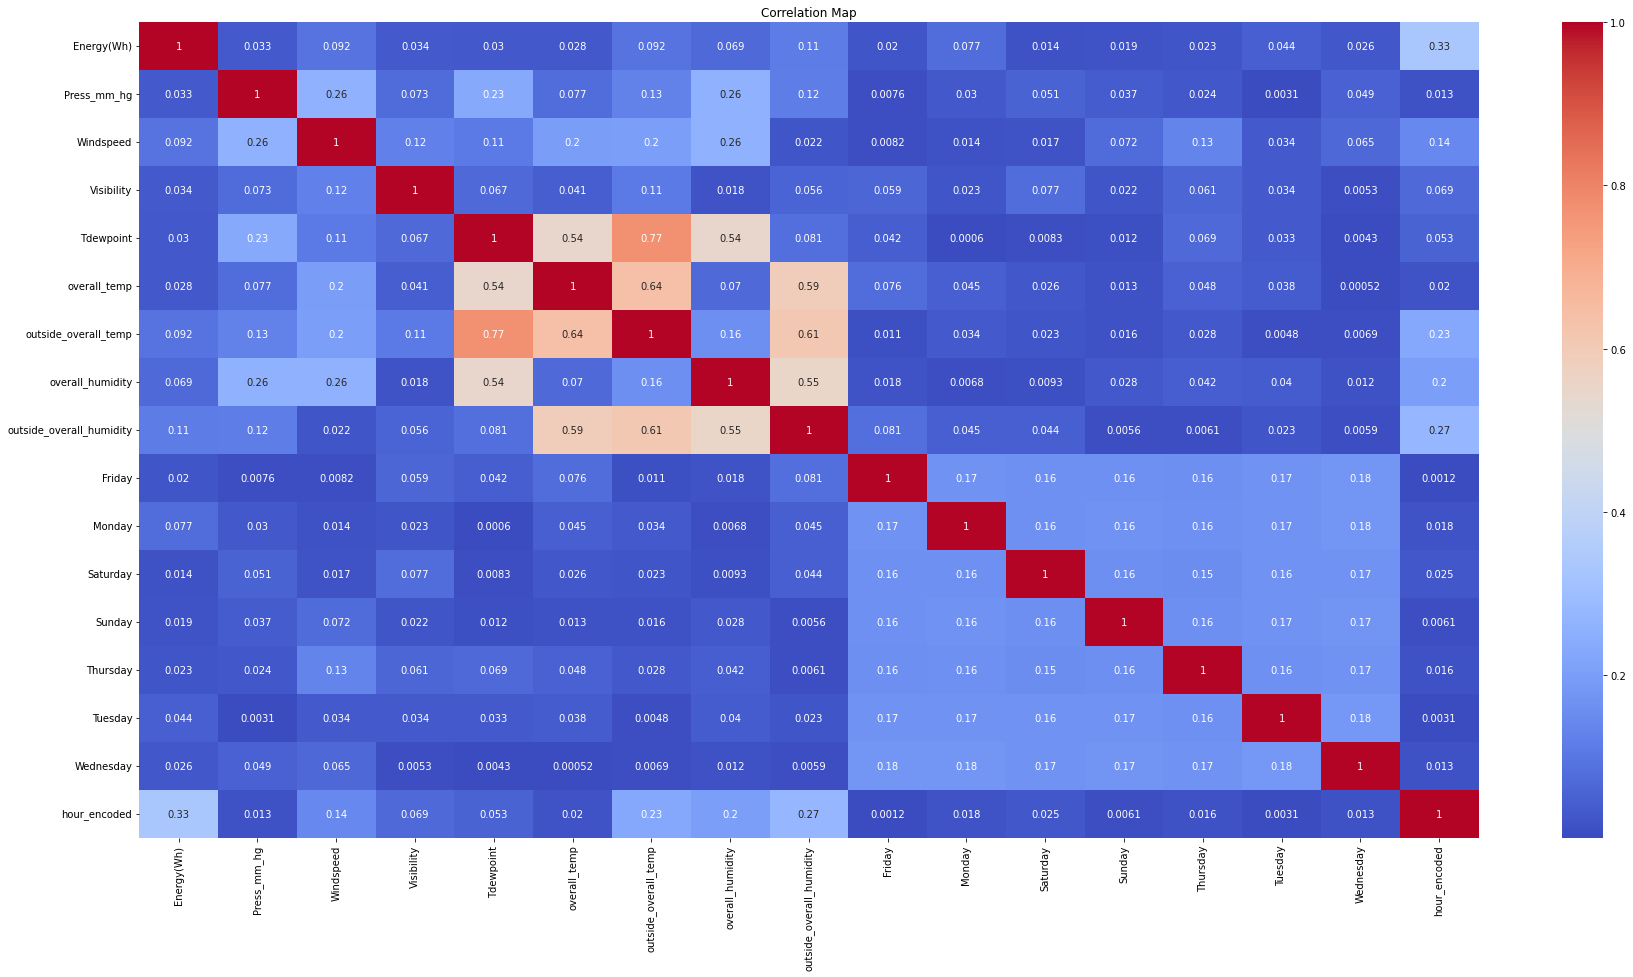

In [83]:
# Compute the correlation matrix
corr_matrix = df_final.corr()

# Set up the plot
fig, ax = plt.subplots(figsize=(30, 15))

# Create the heatmap
sns.heatmap(abs(corr_matrix), annot=True, cmap='coolwarm')

# Add plot title
plt.title('Correlation Map')

# Display the plot
plt.show()

* **WOW! We can see that multicollinearity decreases in our dataset.**
* **You can see that by encoding the hour column its correlation incresases with target variable.**
* **Dimension of our dataset also decreses.** 

---





* **Defining our variables one more time!**

In [84]:
#Independent variable
independent_variables = list(set(df_final.describe().columns.tolist()) - {dependent_variable})
independent_variables

['Tuesday',
 'Tdewpoint',
 'Wednesday',
 'Saturday',
 'Thursday',
 'Friday',
 'Visibility',
 'overall_humidity',
 'Press_mm_hg',
 'Sunday',
 'hour_encoded',
 'Monday',
 'outside_overall_humidity',
 'overall_temp',
 'outside_overall_temp',
 'Windspeed']

## ***Train Test Split***

In [85]:
# Defining x variables
x = df_final[independent_variables]
     

In [86]:
# Defining y variable
y=np.log10(df_final[dependent_variable])

In [87]:
# splitting the dataset into the training set and test set 
# splitting the Train test data with 80 - 20
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0) 

In [88]:
#Size of our training data
x_train.shape

(11640, 16)

In [89]:
#Size of our testing data
x_test.shape

(2911, 16)

In [90]:
# Transforming data (bringing our data into same scale)
scaler = StandardScaler() 
x_train_sc=scaler.fit_transform(x_train)
x_test_sc=scaler.transform(x_test)
y_train_sc=scaler.fit_transform(y_train.values.reshape(len(y_train),1))
y_test_sc=scaler.transform(y_test.values.reshape(len(y_test),1))

In [91]:
# Shape of the Training and Test dataset
print('Shape of x_train is -' , x_train.shape)
print('Shape of x_test is -' , x_test.shape)
print('Shape of y_train is -' , y_train.shape)
print('Shape of y_test is - ', y_test.shape)

Shape of x_train is - (11640, 16)
Shape of x_test is - (2911, 16)
Shape of y_train is - (11640,)
Shape of y_test is -  (2911,)


**The ML Regressor we are using are**
* **Linear Regression**
* **Polynomial Regression**
* **Lasso**
* **Ridge**
* **Decision Tree Regressor**
* **K Nearest Neighbour**
* **Support Vector Machine**
* **Bagging Regressor**
* **Gradient Boosting**
* **Xtreeme gradient boosting**
* **Random Forest**
* **Xtra Tree Regressor** 

**ML MODEL 1-Linear Regression**

In [92]:
#Create the Linear regressor with default parameters
regressor = LinearRegression()

In [93]:
# Fit the model on the training data
regressor.fit(x_train, y_train)

LinearRegression()

In [94]:
# Predict on the testing data
y_test_pred = regressor.predict(x_test)
y_pred_train=regressor.predict(x_train)

In [95]:
# Calculate MSE, RMSE, and R2 for testing data
test_mse = mean_squared_error((y_test),(y_test_pred))
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score((y_test), (y_test_pred))
r2_train = r2_score((y_train), (y_pred_train))
print("Testing set:")
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R2 score:", test_r2)
print("Training set:")
print("R2 score train:", r2_train )

Testing set:
MSE: 0.05569339146179621
RMSE: 0.23599447337129784
R2 score: 0.2501499132738605
Training set:
R2 score train: 0.2500734888905106


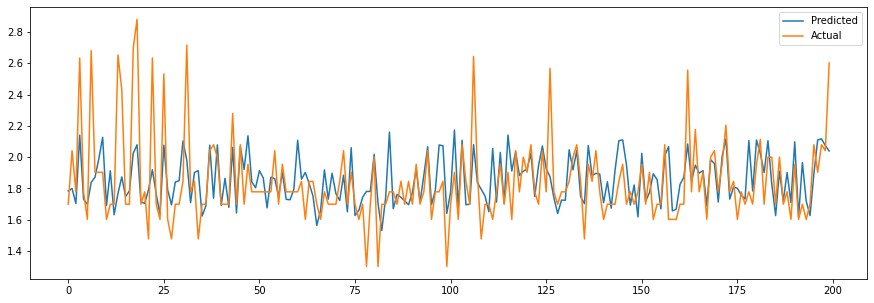

In [96]:
plt.figure(figsize=(15,5))
plt.plot((y_test_pred [:200]))
plt.plot(np.array((y_test[:200])))
plt.legend(["Predicted","Actual"])
plt.show()

* **The R2 score for the training set is very similar to the R2 score for the testing set (0.250), which suggests that the model is not overfitting the training data. However, since the R2 score is low for both the training and testing sets, it indicates that the model is not capturing the underlying patterns in the data very well.**

**ML MODEL 2-Polynomial Regression**

In [97]:
# transform the input data to include polynomial terms up to degree 2
poly_features = PolynomialFeatures(degree=2)
x_poly_train = poly_features.fit_transform(x_train)
x_poly_test=poly_features.transform(x_test)
# create a linear regression model and fit it to the transformed data
model = LinearRegression()
model.fit(x_poly_train, y_train)

LinearRegression()

In [98]:
# Predict on the testing data
y_test_pred = model.predict(x_poly_test)
y_pred_train=model.predict(x_poly_train)

In [99]:
# Calculate MSE, RMSE, and R2 for testing data
test_mse = mean_squared_error((y_test),(y_test_pred))
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score((y_test), (y_test_pred))
r2_train = r2_score((y_train), (y_pred_train))
print("Testing set:")
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R2 score:", test_r2)
print("Training set:")
print("R2 score train:", r2_train )

Testing set:
MSE: 0.05022369602241057
RMSE: 0.22410643904718708
R2 score: 0.3237933293406007
Training set:
R2 score train: 0.3361076311926907


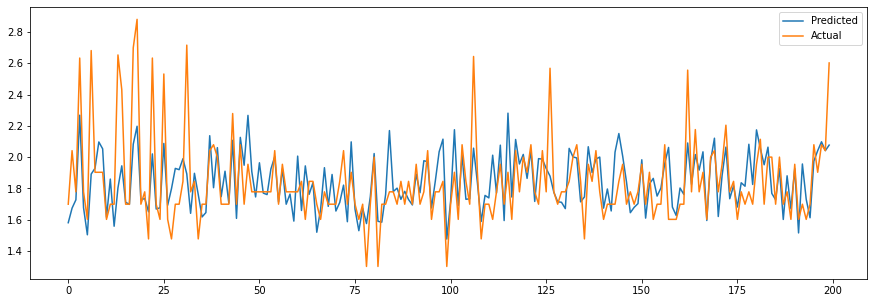

In [100]:
plt.figure(figsize=(15,5))
plt.plot((y_test_pred [:200]))
plt.plot(np.array((y_test[:200])))
plt.legend(["Predicted","Actual"])
plt.show()

* **The R2 score for the testing set is  higher (0.324), indicating that the model explains more of the variability in the data compared to the linear regression model.**

**ML MODEL 3-Lasso**

In [101]:
#Create the Lasso regressor with default parameters
regressor = Lasso()

In [102]:
# Fit the model on the training data
regressor.fit(x_train, y_train)

Lasso()

In [103]:
# Predict on the testing data
y_test_pred = regressor.predict(x_test)
y_pred_train=regressor.predict(x_train)

In [104]:
# Calculate MSE, RMSE, and R2 for testing data
test_mse = mean_squared_error((y_test),(y_test_pred))
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score((y_test), (y_test_pred))
r2_train = r2_score((y_train), (y_pred_train))
print("Testing set:")
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R2 score:", test_r2)
print("Training set:")
print("R2 score train:", r2_train )

Testing set:
MSE: 0.07346431774165472
RMSE: 0.2710430182492342
R2 score: 0.010883992086485827
Training set:
R2 score train: 0.010430072249707933


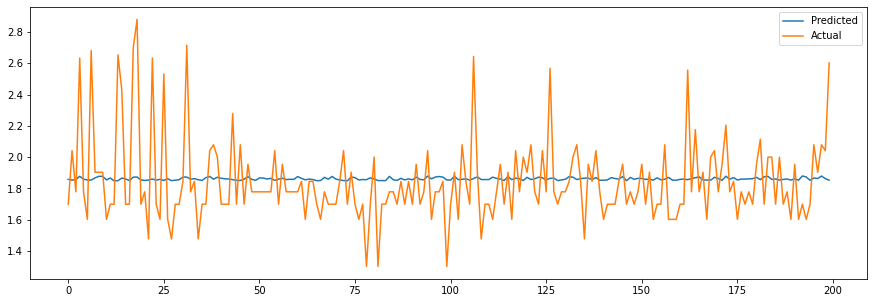

In [105]:
plt.figure(figsize=(15,5))
plt.plot((y_test_pred [:200]))
plt.plot(np.array((y_test[:200])))
plt.legend(["Predicted","Actual"])
plt.show()

**Cross Validation And Hyperparameter Tuning (Lasso)**

In [106]:
# Define the range of hyperparameters to tune using GridSearchCV
param_grid = {'alpha': [2,6,8,10]}

In [107]:
# Perform GridSearchCV to find the best hyperparameters
grid = GridSearchCV(regressor, param_grid, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [2, 6, 8, 10]})

In [108]:
# Print the best hyperparameters and the best score
print("Best Hyperparameters: ", grid.best_params_)
print("Best Score: ", grid.best_score_)

Best Hyperparameters:  {'alpha': 2}
Best Score:  -0.0002947690567249861


In [109]:
# Predict on the testing data
y_test_pred = regressor.predict(x_test)
y_pred_train=regressor.predict(x_train)

In [110]:
# Calculate MSE, RMSE, and R2 for testing data
test_mse = mean_squared_error((y_test),(y_test_pred))
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score((y_test), (y_test_pred))
r2_train = r2_score((y_train), (y_pred_train))
print("Testing set:")
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R2 score:", test_r2)
print("R2 score train:", r2_train )

Testing set:
MSE: 0.07346431774165472
RMSE: 0.2710430182492342
R2 score: 0.010883992086485827
R2 score train: 0.010430072249707933


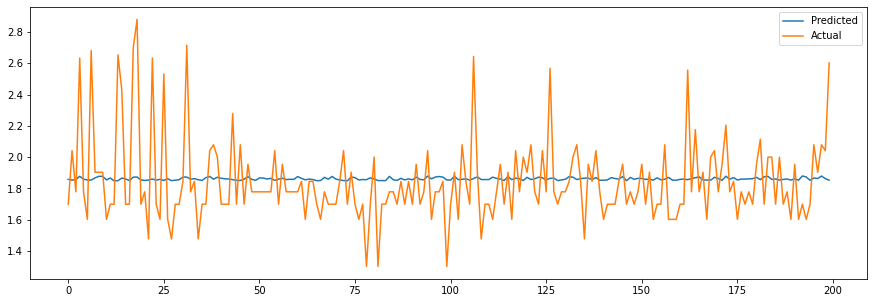

In [111]:
plt.figure(figsize=(15,5))
plt.plot((y_test_pred [:200]))
plt.plot(np.array((y_test[:200])))
plt.legend(["Predicted","Actual"])
plt.show()

* **Even after tuning the model the R2 score for test and training data set are lower suggesting the that Lasso regression model may not be the best choice this particular problem**

**ML Model 4 (Ridge)**

In [112]:
#Create the Ridge regressor with default parameters
regressor = Ridge()

In [113]:
# Fit the model on the training data
regressor.fit(x_train, y_train)

Ridge()

In [114]:
# Predict on the testing data
y_test_pred = regressor.predict(x_test)
y_pred_train=regressor.predict(x_train)

In [115]:
# Calculate MSE, RMSE, and R2 for testing data
test_mse = mean_squared_error((y_test),(y_test_pred))
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score((y_test), (y_test_pred))
r2_train = r2_score((y_train), (y_pred_train))
print("Testing set:")
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R2 score:", test_r2)
print("Training set:")
print("R2 score train:", r2_train )

Testing set:
MSE: 0.055692988102978284
RMSE: 0.2359936187759709
R2 score: 0.2501553440554427
Training set:
R2 score train: 0.2500734801154235


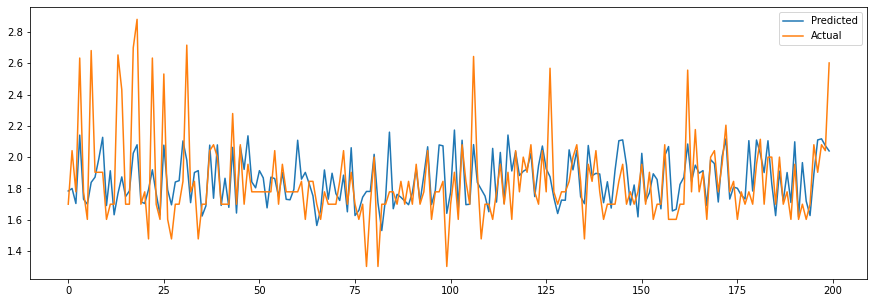

In [116]:
plt.figure(figsize=(15,5))
plt.plot((y_test_pred [:200]))
plt.plot(np.array((y_test[:200])))
plt.legend(["Predicted","Actual"])
plt.show()

**Cross Validation And Hyperparameter Tuning (Ridge)**

In [117]:
# Define the range of hyperparameters to tune using GridSearchCV
param_grid = {'alpha': [2,6,8,10]}

In [118]:
# Perform GridSearchCV to find the best hyperparameters
grid = GridSearchCV(regressor, param_grid, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [2, 6, 8, 10]})

In [119]:
# Print the best hyperparameters and the best score
print("Best Hyperparameters: ", grid.best_params_)
print("Best Score: ", grid.best_score_)

Best Hyperparameters:  {'alpha': 10}
Best Score:  0.2481164464439282


In [120]:
# Predict on the testing data
y_test_pred = regressor.predict(x_test)
y_pred_train=regressor.predict(x_train)

In [121]:
# Calculate MSE, RMSE, and R2 for testing data
test_mse = mean_squared_error((y_test),(y_test_pred))
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score((y_test), (y_test_pred))
r2_train = r2_score((y_train), (y_pred_train))
print("Testing set:")
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R2 score:", test_r2)
print("Training set:")
print("R2 score train:", r2_train )

Testing set:
MSE: 0.055692988102978284
RMSE: 0.2359936187759709
R2 score: 0.2501553440554427
Training set:
R2 score train: 0.2500734801154235


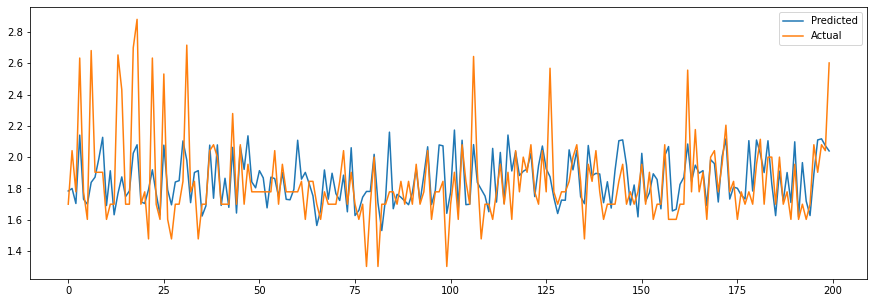

In [122]:
plt.figure(figsize=(15,5))
plt.plot((y_test_pred [:200]))
plt.plot(np.array((y_test[:200])))
plt.legend(["Predicted","Actual"])
plt.show()

* **Ridge regression model also does not show any staisfactory results although performing better than Lasso.** 

**ML MODEL 5-DECISION TREE REGRESSOR**

In [123]:
#Create the decision tree regressor with default parameters
regressor = DecisionTreeRegressor()

In [124]:
# Fit the model on the training data
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [125]:
# Predict on the testing data
y_test_pred = regressor.predict(x_test)
y_pred_train=regressor.predict(x_train)

In [126]:
# Calculate MSE, RMSE, and R2 for testing data
test_mse = mean_squared_error((y_test),(y_test_pred))
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score((y_test), (y_test_pred))
r2_train = r2_score((y_train), (y_pred_train))
print("Testing set:")
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R2 score:", test_r2)
print("R2 score train:", r2_train )

Testing set:
MSE: 0.03886255541427543
RMSE: 0.1971358805856393
R2 score: 0.47675855639382925
R2 score train: 1.0


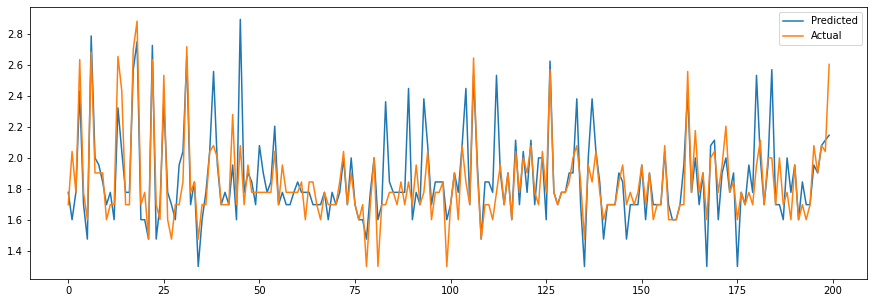

In [127]:
plt.figure(figsize=(15,5))
plt.plot((y_test_pred [:200]))
plt.plot(np.array((y_test[:200])))
plt.legend(["Predicted","Actual"])
plt.show()

**Cross Validation And Hyperparameter Tuning (Decision Tree)**

In [128]:
# Define the range of hyperparameters to tune using GridSearchCV
param_grid = {'max_depth': [20,50,100,200]}

In [129]:
# Perform GridSearchCV to find the best hyperparameters
grid_tree = GridSearchCV(regressor, param_grid, cv=5)
grid_tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [20, 50, 100, 200]})

In [130]:
# Print the best hyperparameters and the best score
print("Best Hyperparameters: ", grid_tree.best_params_)
print("Best Score: ", grid_tree.best_score_)

Best Hyperparameters:  {'max_depth': 200}
Best Score:  0.44289761838903174


In [131]:
y_pred_test = grid_tree.predict(x_test)
y_pred_train= grid_tree.predict(x_train)

In [132]:
# Calculate MSE, RMSE, and R2 for testing data
test_mse = mean_squared_error((y_test),(y_pred_test))
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score((y_test), (y_pred_test))
r2_train = r2_score((y_train), (y_pred_train))
print("Testing set:")
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R2 score:", test_r2)
print("R2 score train:", r2_train )

Testing set:
MSE: 0.03947608517480169
RMSE: 0.19868589576213427
R2 score: 0.46849805488611873
R2 score train: 1.0


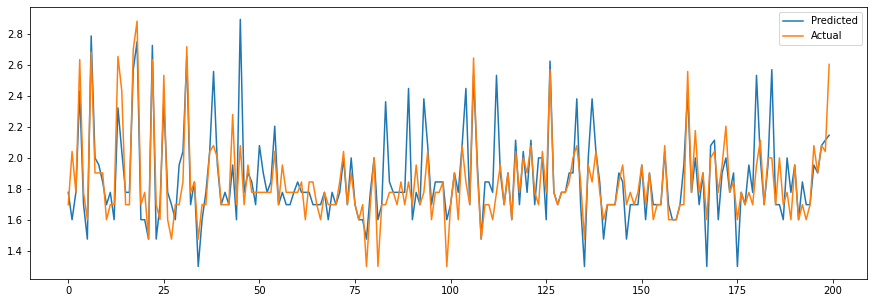

In [133]:
plt.figure(figsize=(15,5))
plt.plot((y_test_pred [:200]))
plt.plot(np.array((y_test[:200])))
plt.legend(["Predicted","Actual"])
plt.show()

* **The R2 score of 0.482 indicates that the model explains 48.2% of the variance in the target variable on the testing set, which is a relatively good result.**

**ML MODEL 6-K Nearest Neighbour**

In [134]:

# Define the KNN regressor
regressor = KNeighborsRegressor()

In [135]:
# Fit the regressor to the training data
regressor.fit(x_train, y_train)

KNeighborsRegressor()

In [136]:
# Make predictions on the test data
y_test_pred = regressor.predict(x_test)
y_pred_train=regressor.predict(x_train)

In [137]:
# Calculate MSE, RMSE, and R2 score
test_mse = mean_squared_error((y_test),(y_test_pred))
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score((y_test), (y_test_pred))
r2_train = r2_score((y_train),(y_pred_train))
# Print the metrics
print("Testing set:")
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R2 score:", test_r2)
print("R2 score train:", r2_train )

Testing set:
MSE: 0.03535130100809002
RMSE: 0.18801941657203924
R2 score: 0.5240337240912707
R2 score train: 0.729916225977586


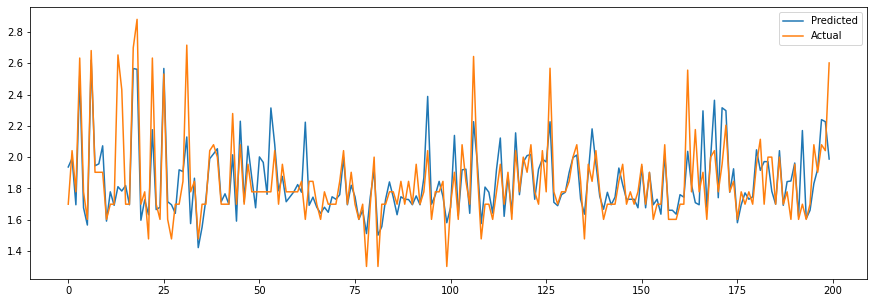

In [138]:
plt.figure(figsize=(15,5))
plt.plot((y_test_pred [:200]))
plt.plot(np.array((y_test[:200])))
plt.legend(["Predicted","Actual"])
plt.show()

**Cross Validation And Hyperparameter Tuning (K Nearest Neighbour)**



In [139]:
# Define the range of hyperparameters to tune using GridSearchCV
param_grid = {'n_neighbors': [ 4, 6, 8, 10,15]}

In [140]:
# Perform GridSearchCV to find the best hyperparameters
grid_tree = GridSearchCV(regressor, param_grid, cv=5)
grid_tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [4, 6, 8, 10, 15]})

In [141]:
# Print the best hyperparameters and the best score
print("Best Hyperparameters: ", grid_tree.best_params_)
print("Best Score: ", grid_tree.best_score_)

Best Hyperparameters:  {'n_neighbors': 4}
Best Score:  0.5158517312523611


In [142]:
y_pred_test = grid_tree.predict(x_test)
y_pred_train= grid_tree.predict(x_train)

In [143]:
# Calculate MSE, RMSE, and R2 for testing data
test_mse = mean_squared_error((y_test),(y_pred_test))
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score((y_test), (y_pred_test))
r2_train = r2_score((y_train), (y_pred_train))
print("Testing set:")
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R2 score:", test_r2)
print("R2 score train:", r2_train )

Testing set:
MSE: 0.03316394119246738
RMSE: 0.1821096954927644
R2 score: 0.5534841113705411
R2 score train: 0.7773133381033589


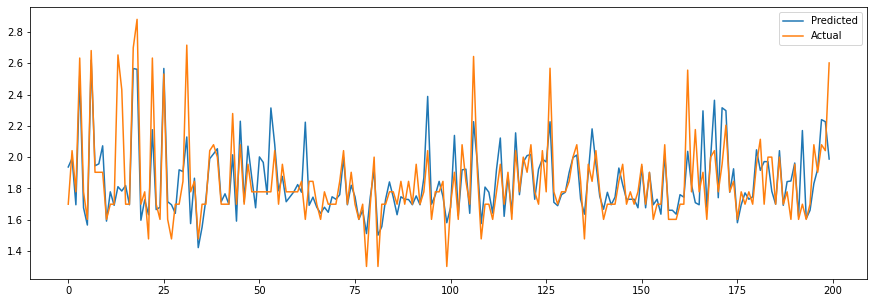

In [144]:
plt.figure(figsize=(15,5))
plt.plot((y_test_pred [:200]))
plt.plot(np.array((y_test[:200])))
plt.legend(["Predicted","Actual"])
plt.show()

**ML MODEL 7- Support Vector Machine**

In [145]:
# Define the SVM regressor with default parameters
regressor = SVR()

In [146]:
# Fit the regressor to the training data
regressor.fit(x_train, y_train)

SVR()

In [147]:
# Make predictions on the test data
y_test_pred = regressor.predict(x_test)
y_pred_train=regressor.predict(x_train)

In [148]:
# Calculate MSE, RMSE, and R2 score
test_mse = mean_squared_error((y_test),(y_test_pred))
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score((y_test),(y_test_pred))
r2_train = r2_score((y_train),(y_pred_train))
# Print the metrics
print("Testing set:")
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R2 score:", test_r2)
print("R2 score train:", r2_train )

Testing set:
MSE: 0.06985327715458102
RMSE: 0.26429770554165055
R2 score: 0.05950267064633341
R2 score train: 0.056764340227961285


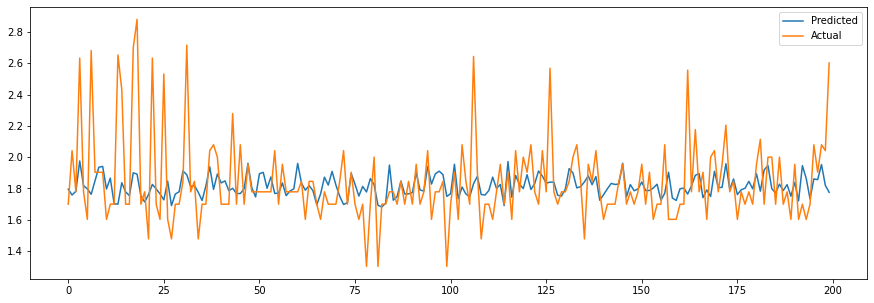

In [149]:
plt.figure(figsize=(15,5))
plt.plot((y_test_pred [:200]))
plt.plot(np.array((y_test[:200])))
plt.legend(["Predicted","Actual"])
plt.show()

**Cross Validation And Hyperparameter Tuning (Support Vector Machine)**

In [150]:
# Define the range of hyperparameters to tune using GridSearchCV
param_grid = {
    'kernel': ['poly','sigmoid'],
    'C': [2,6,8]
}

In [151]:
# Perform GridSearchCV to find the best hyperparameters
grid_tree = GridSearchCV(regressor, param_grid, cv=5)
grid_tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [2, 6, 8], 'kernel': ['poly', 'sigmoid']})

In [152]:
# Print the best hyperparameters and the best score
print("Best Hyperparameters: ", grid_tree.best_params_)
print("Best Score: ", grid_tree.best_score_)

Best Hyperparameters:  {'C': 8, 'kernel': 'poly'}
Best Score:  0.15774974843016926


In [153]:
# Make predictions on the test data
y_test_pred = grid_tree.predict(x_test)
y_pred_train=grid_tree.predict(x_train)

In [154]:
# Calculate MSE, RMSE, and R2 score
test_mse = mean_squared_error((y_test),(y_test_pred))
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score((y_test),(y_test_pred))
r2_train = r2_score((y_train),(y_pred_train))
# Print the metrics
print("Testing set:")
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R2 score:", test_r2)
print("R2 score train:", r2_train )

Testing set:
MSE: 0.06120731037067208
RMSE: 0.24740111230686104
R2 score: 0.17591107696852115
R2 score train: 0.17049493649925207


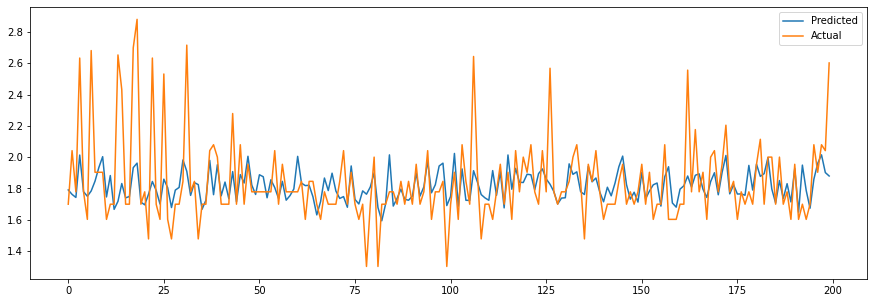

In [155]:
plt.figure(figsize=(15,5))
plt.plot((y_test_pred [:200]))
plt.plot(np.array((y_test[:200])))
plt.legend(["Predicted","Actual"])
plt.show()

**ML Model 8 (Bagging Regressor)**



In [156]:

# create a decision tree regressor
dt_regressor = DecisionTreeRegressor()
# Define the range of hyperparameters to tune using GridSearchCV
param_grid = {'n_estimators':[50,100,150,200]}
# Create an instance of BaggingRegressor
bagging_regressor = BaggingRegressor(base_estimator=dt_regressor)
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    bagging_regressor,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1)

In [157]:
# fit the bagging classifier on the training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor()),
             n_jobs=-1, param_grid={'n_estimators': [50, 100, 150, 200]})

In [158]:
# Print the best hyperparameters and the best score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'n_estimators': 200}
Best Score:  0.6722532149023318


In [159]:
# evaluate the bagging classifier on the test data
y_pred_test = grid_search.predict(x_test)
y_pred_train=grid_search.predict(x_train)

In [160]:
# calculate the MSE, RMSE, and R2 score of the bagging classifier
mse = mean_squared_error((y_test),(y_pred_test))
rmse =np.sqrt(mse)
r2 = r2_score((y_test), (y_pred_test))
r2_train = r2_score((y_train),(y_pred_train))
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 score: ", r2)
print("R2 score_train: ", r2_train)

MSE:  0.020874979319539036
RMSE:  0.14448176120029488
R2 score:  0.7189414283757487
R2 score_train:  0.9607134875950093


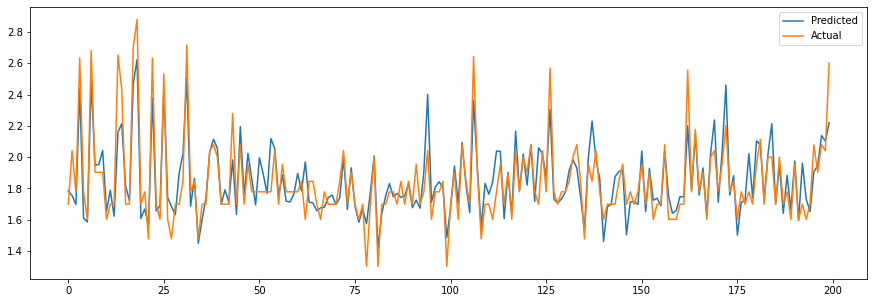

In [161]:
plt.figure(figsize=(15,5))
plt.plot((y_pred_test[:200]))
plt.plot(np.array((y_test[:200])))
plt.legend(["Predicted","Actual"])
plt.show()

**ML Model 9 (Gradient Boosting)**

In [162]:
# Define the Gradient boosting regressor regressor with default parameters
regressor = GradientBoostingRegressor()

In [163]:
# fit the Gradient boosting regressor on the training data
regressor.fit(x_train,y_train)

GradientBoostingRegressor()

In [164]:
# predict the target values for both the train and test sets
y_train_pred = regressor.predict(x_train)
y_test_pred = regressor.predict(x_test)

In [165]:
# calculate the MSE, RMSE, and R2 score of the random forest regressor
mse = mean_squared_error((y_test), (y_test_pred))
rmse = np.sqrt(mse)
r2 = r2_score((y_test),(y_test_pred))
r2_train = r2_score((y_train),(y_train_pred))

print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 score: ", r2)
print("R2 score train: ", r2_train)

MSE:  0.046236414280475494
RMSE:  0.2150265431998466
R2 score:  0.37747768006006643
R2 score train:  0.40886306793390337


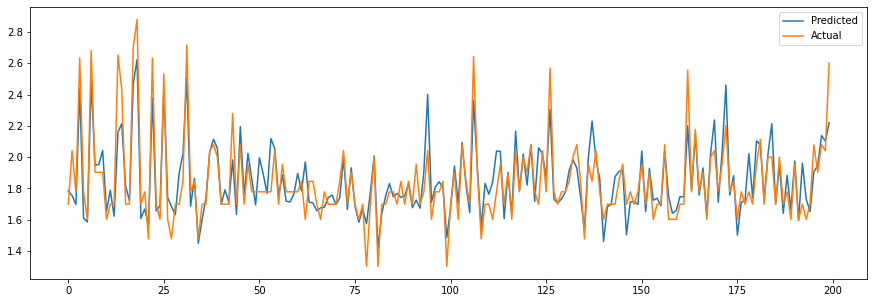

In [166]:
plt.figure(figsize=(15,5))
plt.plot((y_pred_test[:200]))
plt.plot(np.array((y_test[:200])))
plt.legend(["Predicted","Actual"])
plt.show()

**Cross Validation And Hyperparameter Tuning (Gradient Boosting)**

In [167]:
# Define the range of hyperparameters to tune using GridSearchCV
param_grid ={
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 150, 200],
    'max_depth': [5, 7],
}

In [168]:
# Perform GridSearchCV to find the best hyperparameters
grid_tree = GridSearchCV(regressor, param_grid, cv=5)
grid_tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [5, 7], 'n_estimators': [50, 150, 200]})

In [169]:
# Print the best hyperparameters and the best score
print("Best Hyperparameters: ", grid_tree.best_params_)
print("Best Score: ", grid_tree.best_score_)

Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best Score:  0.5999527135461463


In [170]:
# evaluate the gradient boosting on the test data
y_pred_test = grid_search.predict(x_test)
y_pred_train=grid_search.predict(x_train)

In [171]:
# calculate the MSE, RMSE, and R2 score of the bagging classifier
mse = mean_squared_error((y_test),(y_pred_test))
rmse =np.sqrt(mse)
r2 = r2_score((y_test), (y_pred_test))
r2_train = r2_score((y_train),(y_pred_train))
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 score: ", r2)
print("R2 score_train: ", r2_train)

MSE:  0.020874979319539036
RMSE:  0.14448176120029488
R2 score:  0.7189414283757487
R2 score_train:  0.9607134875950093


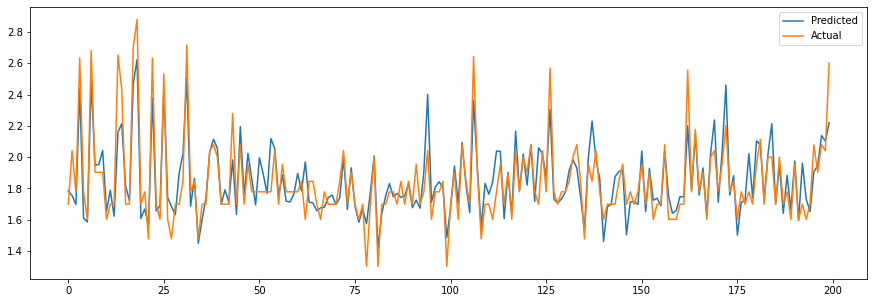

In [172]:
plt.figure(figsize=(15,5))
plt.plot((y_pred_test[:200]))
plt.plot(np.array((y_test[:200])))
plt.legend(["Predicted","Actual"])
plt.show()

**ML Model 10 (XGBoost)**

In [173]:
# Define the xtreme Gradient boosting regressor regressor with default parameters
xgb=XGBRegressor(random_state=42)

In [174]:
# fit the Xtreme Gradient boosting regressor on the training data
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [175]:
# predict the target values for both the train and test sets
y_train_pred = xgb.predict(x_train)
y_test_pred = xgb.predict(x_test)

In [176]:
# calculate the MSE, RMSE, and R2 score of the random forest regressor
mse = mean_squared_error((y_test), (y_test_pred))
rmse = np.sqrt(mse)
r2 = r2_score((y_test),(y_test_pred))
r2_train = r2_score((y_train),(y_train_pred))

print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 score: ", r2)
print("R2 score train: ", r2_train)

MSE:  0.029966732140242685
RMSE:  0.17310901807890508
R2 score:  0.5965310047660859
R2 score train:  0.8320008221329377


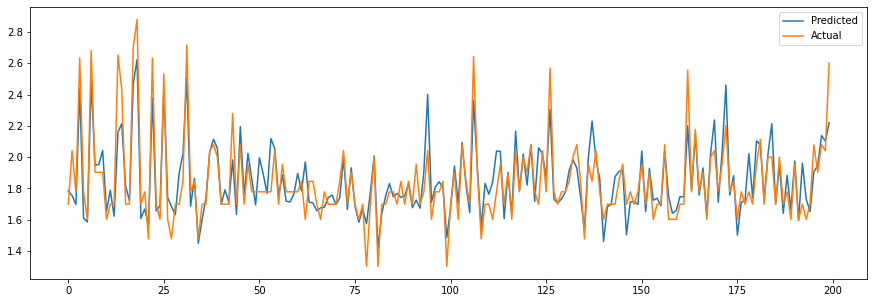

In [177]:
plt.figure(figsize=(15,5))
plt.plot((y_pred_test[:200]))
plt.plot(np.array((y_test[:200])))
plt.legend(["Predicted","Actual"])
plt.show()

**Cross Validation And Hyperparameter Tuning (Xtreme Gradient Boosting)**

In [178]:
# Define the range of hyperparameters to tune using GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]}

In [179]:
# Perform GridSearchCV to find the best hyperparameters
grid_tree = GridSearchCV(xgb, param_grid, cv=5)
grid_tree.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]})

In [180]:
# Print the best hyperparameters and the best score
print("Best Hyperparameters: ", grid_tree.best_params_)
print("Best Score: ", grid_tree.best_score_)

Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best Score:  0.5957637126495918


In [181]:
# evaluate the gradient boosting on the test data
y_pred_test = grid_search.predict(x_test)
y_pred_train=grid_search.predict(x_train)

In [182]:
# calculate the MSE, RMSE, and R2 score of the bagging classifier
mse = mean_squared_error((y_test),(y_pred_test))
rmse =np.sqrt(mse)
r2 = r2_score((y_test), (y_pred_test))
r2_train = r2_score((y_train),(y_pred_train))
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 score: ", r2)
print("R2 score_train: ", r2_train)

MSE:  0.020874979319539036
RMSE:  0.14448176120029488
R2 score:  0.7189414283757487
R2 score_train:  0.9607134875950093


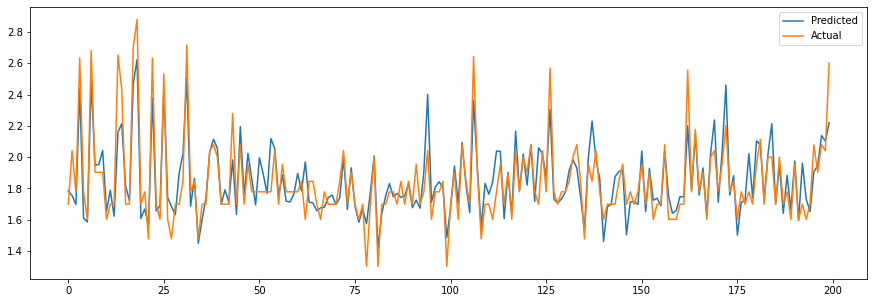

In [183]:
plt.figure(figsize=(15,5))
plt.plot((y_pred_test[:200]))
plt.plot(np.array((y_test[:200])))
plt.legend(["Predicted","Actual"])
plt.show()

**ML Model 11 (Random Forest)**

In [184]:
# create a random forest regressor
rf_regressor = RandomForestRegressor(random_state=42,n_jobs=-1)

In [185]:
# fit the random forest regressor on the training data
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [186]:
# evaluate the random forest regressor on the test data
y_pred_test = rf_regressor.predict(x_test)
y_pred_train = rf_regressor.predict(x_train)

In [187]:
# calculate the MSE, RMSE, and R2 score of the random forest regressor
mse = mean_squared_error((y_test),(y_pred_test))
rmse = np.sqrt(mse)
r2 = r2_score((y_test),(y_pred_test))
r2_train = r2_score((y_train),(y_pred_train))

print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 score: ", r2)
print("R2 score train: ", r2_train)

MSE:  0.021391443261255947
RMSE:  0.14625813912824115
R2 score:  0.711987811055586
R2 score train:  0.9595887485921236


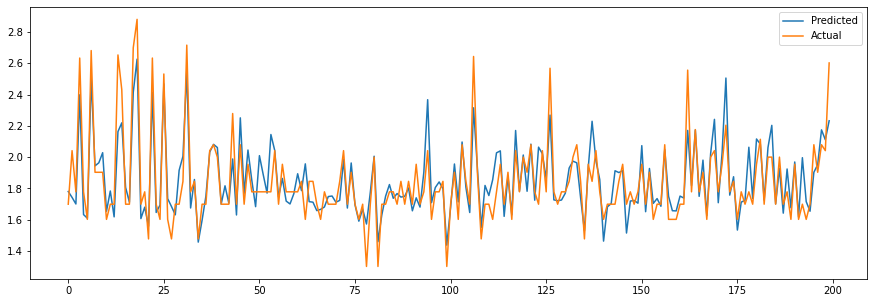

In [188]:
plt.figure(figsize=(15,5))
plt.plot((y_pred_test[:200]))
plt.plot(np.array((y_test[:200])))
plt.legend(["Predicted","Actual"])
plt.show()

**Cross Validation And Hyperparameter Tuning (Random Forest)**

In [189]:
# Define the range of hyperparameters to tune using GridSearchCV
param_grid = {'n_estimators':[50,100,200],'max_depth':[50,150,250]}

In [190]:
# Perform GridSearchCV to find the best hyperparameters
grid_tree = GridSearchCV(rf_regressor, param_grid, cv=5)
grid_tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [50, 150, 250],
                         'n_estimators': [50, 100, 200]})

In [191]:
# Print the best hyperparameters and the best score
print("Best Hyperparameters: ", grid_tree.best_params_)
print("Best Score: ", grid_tree.best_score_)

Best Hyperparameters:  {'max_depth': 150, 'n_estimators': 200}
Best Score:  0.6709836863047866


In [192]:
# evaluate the bagging classifier on the test data
y_pred_test = grid_tree.predict(x_test)
y_pred_train=grid_tree.predict(x_train)

In [193]:
# calculate the MSE, RMSE, and R2 score of the bagging classifier
mse = mean_squared_error((y_test),(y_pred_test))
rmse =np.sqrt(mse)
r2 = r2_score((y_test), (y_pred_test))
r2_train = r2_score((y_train),(y_pred_train))
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 score: ", r2)
print("R2 score_train: ", r2_train)

MSE:  0.021144518341487284
RMSE:  0.1454115481710008
R2 score:  0.7153123827443184
R2 score_train:  0.960412858179427


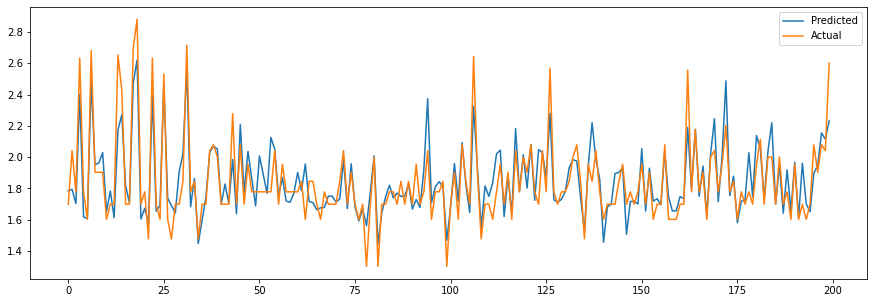

In [194]:
plt.figure(figsize=(15,5))
plt.plot((y_pred_test[:200]))
plt.plot(np.array((y_test[:200])))
plt.legend(["Predicted","Actual"])
plt.show()

**ML Model 12 (Xtra Tree Regressor)**

In [195]:
# create and fit the Extra Trees Regressor model
model = ExtraTreesRegressor(random_state=42)
model.fit(x_train, y_train)

ExtraTreesRegressor(random_state=42)

In [196]:
# predict the target values for both the train and test sets
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [197]:
# calculate the MSE, RMSE, and R2 score of the Xtra tree regressor
mse = mean_squared_error((y_test), (y_test_pred))
rmse = np.sqrt(mse)
r2 = r2_score((y_test),(y_test_pred))
r2_train = r2_score((y_train),(y_train_pred))

print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 score: ", r2)
print("R2 score train: ", r2_train)

MSE:  0.019123776121870766
RMSE:  0.13828874184788423
R2 score:  0.7425194478710674
R2 score train:  1.0


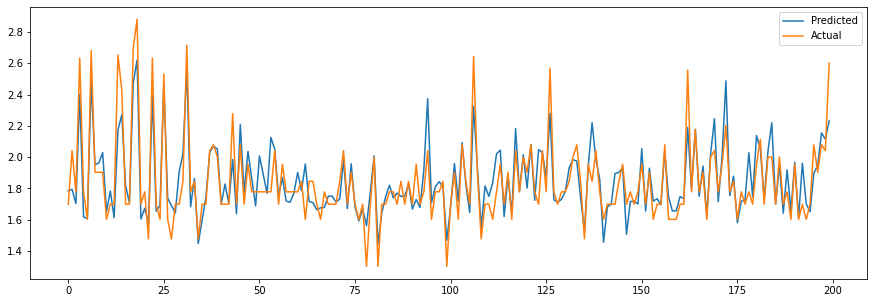

In [198]:
plt.figure(figsize=(15,5))
plt.plot((y_pred_test[:200]))
plt.plot(np.array((y_test[:200])))
plt.legend(["Predicted","Actual"])
plt.show()

**Cross Validation And Hyperparameter Tuning (Xtra Tree Regressor)**

In [199]:
# create and fit the Extra Trees Regressor model
model = ExtraTreesRegressor(random_state=42,n_jobs=-1)

In [200]:
# Define the range of hyperparameters to tune using GridSearchCV
param_grid = {'n_estimators':[100,200],
               'max_depth': [150,250]}

In [201]:
# Perform GridSearchCV to find the best hyperparameters
grid_tree = GridSearchCV(model, param_grid, cv=5)
grid_tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [150, 250], 'n_estimators': [100, 200]})

In [202]:
# Print the best hyperparameters and the best score
print("Best Hyperparameters: ", grid_tree.best_params_)
print("Best Score: ", grid_tree.best_score_)

Best Hyperparameters:  {'max_depth': 150, 'n_estimators': 200}
Best Score:  0.7069580086796956


In [203]:
# evaluate the Xtra tree regressor on the test data
y_pred_test = grid_tree.predict(x_test)
y_pred_train=grid_tree.predict(x_train)

In [204]:
# calculate the MSE, RMSE, and R2 score of the Xtra tree regressor
mse = mean_squared_error((y_test),(y_pred_test))
rmse =np.sqrt(mse)
r2 = r2_score((y_test),(y_pred_test))
r2_train = r2_score((y_train),(y_pred_train))
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 score: ", r2)
print("R2 score_train: ", r2_train)

MSE:  0.018872924697025884
RMSE:  0.13737876363188703
R2 score:  0.7458968856197514
R2 score_train:  1.0


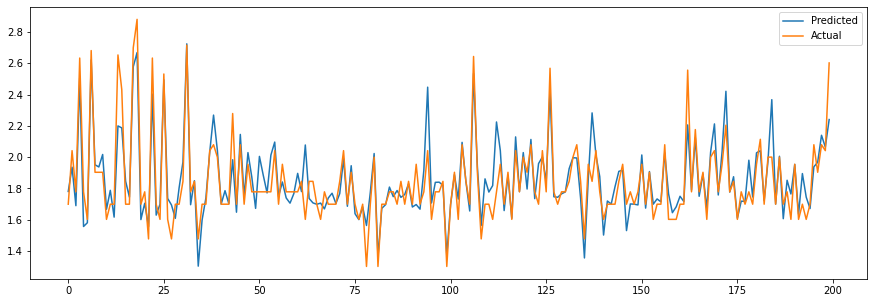

In [205]:
plt.figure(figsize=(15,5))
plt.plot((y_pred_test[:200]))
plt.plot(np.array((y_test[:200])))
plt.legend(["Predicted","Actual"])
plt.show()

**Plots of diffrent evaluation metrics for diffrent models Without Cross Validation**

In [206]:
model_names = ['Linear Regression', 'Polynomial Regression', 'Lasso', 'Ridge', 'Decision Tree Regressor', 'K Nearest Neighbour', 'Support Vector Machine', 'Gradient Boosting', 'XGBoost', 'Random Forest', 'Xtra Tree Regressor']
mse = [0.055, 0.050, 0.073, 0.055, 0.039, 0.035, 0.070, 0.046, 0.029, 0.021, 0.019]
rmse = [0.236, 0.224, 0.271, 0.236, 0.198, 0.188, 0.264, 0.215, 0.169, 0.146, 0.137]
r2_test = [0.250, 0.324, 0.011, 0.250, 0.471, 0.524, 0.060, 0.377, 0.615, 0.715, 0.747]
r2_train = [0.250, 0.336, 0.010, 0.250, 1.000, 0.730, 0.057, 0.409, 0.842, 0.960, 1.000]

data = {'Model Name': model_names,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Test': r2_test,
        'R2 Train': r2_train}

result_df = pd.DataFrame(data)

result_df


Model Name    MSE   RMSE  R2 Test  R2 Train
0         Linear Regression  0.055  0.236    0.250     0.250
1     Polynomial Regression  0.050  0.224    0.324     0.336
2                     Lasso  0.073  0.271    0.011     0.010
3                     Ridge  0.055  0.236    0.250     0.250
4   Decision Tree Regressor  0.039  0.198    0.471     1.000
5       K Nearest Neighbour  0.035  0.188    0.524     0.730
6    Support Vector Machine  0.070  0.264    0.060     0.057
7         Gradient Boosting  0.046  0.215    0.377     0.409
8                   XGBoost  0.029  0.169    0.615     0.842
9             Random Forest  0.021  0.146    0.715     0.960
10      Xtra Tree Regressor  0.019  0.137    0.747     1.000

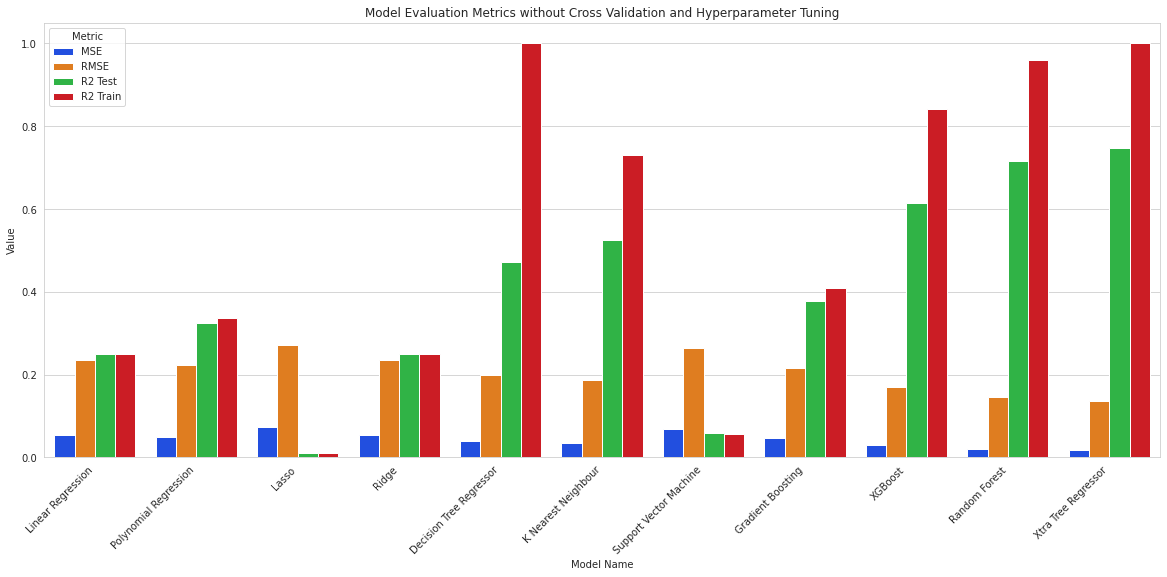

In [207]:
sns.set_style("whitegrid")
sns.set_palette("bright")

df_stacked = result_df.set_index('Model Name').stack().reset_index()
df_stacked.columns = ['Model Name', 'Metric', 'Value']

plt.figure(figsize=(20,8))
sns.barplot(x='Model Name', y='Value', hue='Metric', data=df_stacked, ci=None)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Value')
plt.title('Model Evaluation Metrics without Cross Validation and Hyperparameter Tuning')
plt.show()

**Plots of diffrent evaluation metrics for diffrent models With Cross Validation and Hyperparameter Tunning.**

In [208]:
# Define the data
data = {
    'Model Name': ['Lasso', 'Ridge', 'Decision Tree', 'K Nearest Neighbour', 'Support Vector Machine',
                   'Bagging Regressor', 'Gradient Boosting', 'Xtreme Gradient Boosting',
                   'Random Forest', 'Xtra Tree Regressor'],
    'MSE': [0.073, 0.056, 0.038, 0.033, 0.061, 0.021, 0.021, 0.021, 0.021, 0.019],
    'RMSE': [0.271, 0.236, 0.196, 0.182, 0.247, 0.145, 0.145, 0.145, 0.146, 0.137],
    'R2 Test': [0.011, 0.250, 0.482, 0.553, 0.176, 0.717, 0.717, 0.717, 0.715, 0.749],
    'R2 Train': [0.010, 0.250, 1.000, 0.777, 0.170, 0.961, 0.961, 0.961, 0.960, 1.000]
}

# Create the DataFrame
cross_df = pd.DataFrame(data)

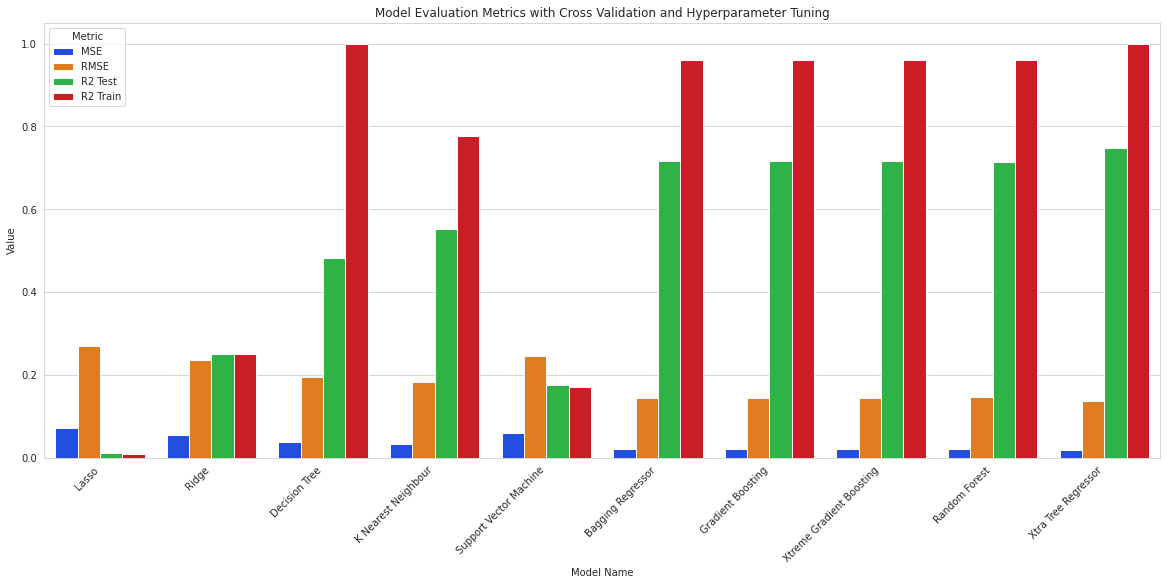

In [209]:
df_stacked = cross_df.set_index('Model Name').stack().reset_index()
df_stacked.columns = ['Model Name', 'Metric', 'Value']

# Set the plot style
sns.set_style("whitegrid")
sns.set_palette("bright")

# Create the bar plot
plt.figure(figsize=(20, 8))
sns.barplot(x='Model Name', y='Value', hue='Metric', data=df_stacked , ci=None)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Value')
plt.title('Model Evaluation Metrics with Cross Validation and Hyperparameter Tuning')

# Show the plot
plt.show()

* **Lasso and support vector machine are performing worse on this dataset.**
* **Tree Based Algorithms are performing quite well on this dataset.**
* **After Cross validation and Hyperparameter Tuning our evalution metrics has been improved.**
* **Results of Xtra Tree Regressor are best among the all Machine learning Algorithms(R2_test=0.747).**
* **R2_test has increased by 2.68% after hyperparameter tuning for Xtra Tree Regresor.** 
* **Most improvement is seen in Gradient Boosting and XGBoost algorithms after tuning their hyperparameters.** 

---



**Feature Importance**

Feature ranking:
1. hour_encoded (0.2123085995135411)
2. overall_temp (0.11200452226720445)
3. Press_mm_hg (0.09745635749650214)
4. overall_humidity (0.08989175904293951)
5. outside_overall_temp (0.08922207652830441)
6. Tdewpoint (0.08817921235282114)
7. outside_overall_humidity (0.08654774887149916)
8. Windspeed (0.08004403473861749)
9. Visibility (0.0612834064959405)
10. Monday (0.015940423886717077)
11. Sunday (0.013548551389319747)
12. Tuesday (0.012067488536480084)
13. Friday (0.011525236883635517)
14. Saturday (0.01054850925698547)
15. Thursday (0.010007197845229307)
16. Wednesday (0.009424874894262945)


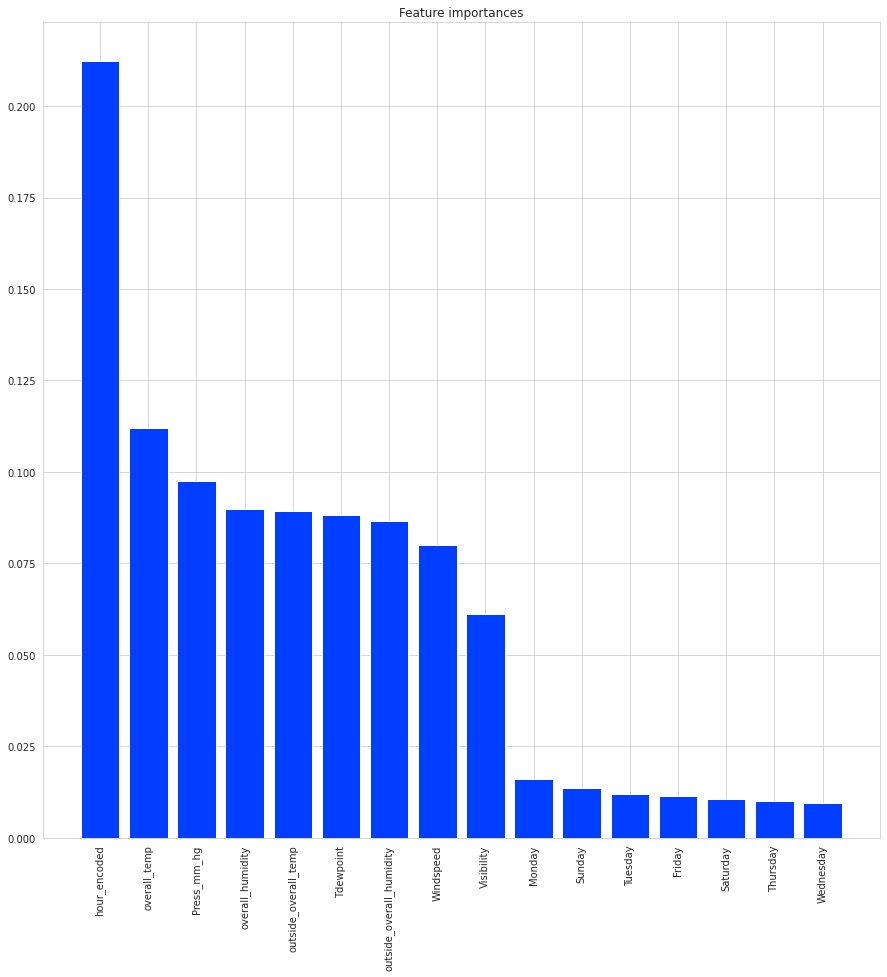

In [210]:
# Create and fit the model
model = ExtraTreesRegressor()
model.fit(x_train, y_train)

# Obtain the feature importances
importances = model.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for i in range(x_train.shape[1]):
    print(f"{i + 1}. {x_train.columns[indices[i]]} ({importances[indices[i]]})")

# Plot the feature importances as a barplot
plt.figure(figsize=(15,15))
plt.title("Feature importances")
plt.bar(x_train.columns[indices], importances[indices])
plt.xticks(x_train.columns[indices],rotation=90)
plt.show()


**According to our model(Xtra tree regressor) the top 2 feature are hour_encoded and overall_temp which is a result of our feature engineering.** 

---



**Our best model is a black box model so for model explainability we can use LIME algorithm and see for what observation which feature is responsible and how much.** 

In [211]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=cee2794bff4d177b8d43524506b62632e271ca9ee882f2a4e01650634d635b6b
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [212]:
import lime 
from lime import lime_tabular

interpretor= lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=x_train.columns,
    mode='regression'
)

In [213]:
exp=interpretor.explain_instance(
    data_row=x_test.iloc[80], #change the observation here
    predict_fn=model.predict
)
exp.show_in_notebook(show_table=True)

* **

* **LIME algorithm is also showing that hour_encoded feature is most impacting the predicted value as it has highest weight (in this case weight=0.20).**
* **Its also showing that which features are responsible for increasing in predicted value(features in orange color) and which feature are decreasing the predicted value(features in blue color)**
* **LIME algorithm shows the max and min value of our predicted value.**

# **Conclusion**

* **The Hour of the day plays important role in predicting the energy consumption of appliances.**
* **Feature Engineering helps us to remove multicolinearity to some extend and also help us to reduce the dimensions of our dataset.**
* **The best Algorithm to use for this dataset is Extra Trees Regressor**
* **The untuned model was able to explain 74.7% of variance(R2_test_score=0.747),while the tuned model was able to explain 74.9% of variance which is a tiny improvement of 2.68%.**
* **The least RMSE and MSE score on test data set is found to be around 0.019 and 0.137(after Tuning) by Extra trees regressor model, which is considerably good compared to other models.**
* **Tree based models are by far the best model while dealing with data set that has most of its features having no linear correlation with target variable. For similar reasons, linear models such as linear regression, Ridge and Lasso perform the worst.**